# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$
    \nabla_{w} Q(w) = - \dfrac{2}{\ell}X^T \left( y - Xw \right)
$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла). Done

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла). Done

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла). Done

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла). Done

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла). Done

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

from tqdm.auto import tqdm
import numpy as np
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95887663/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/95893382/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/95893710/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/95897627/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/95895835/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм.  Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

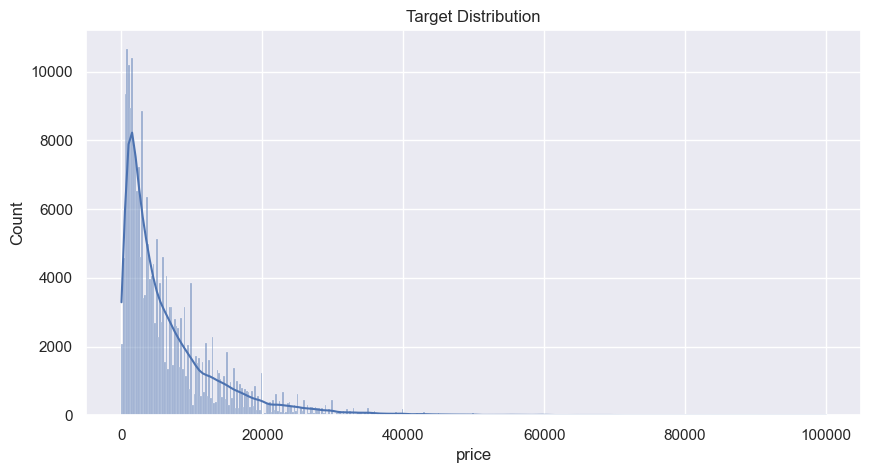

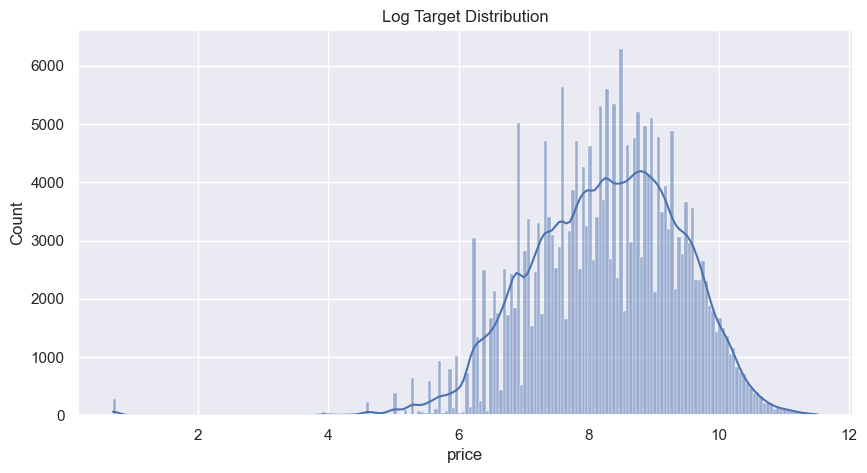

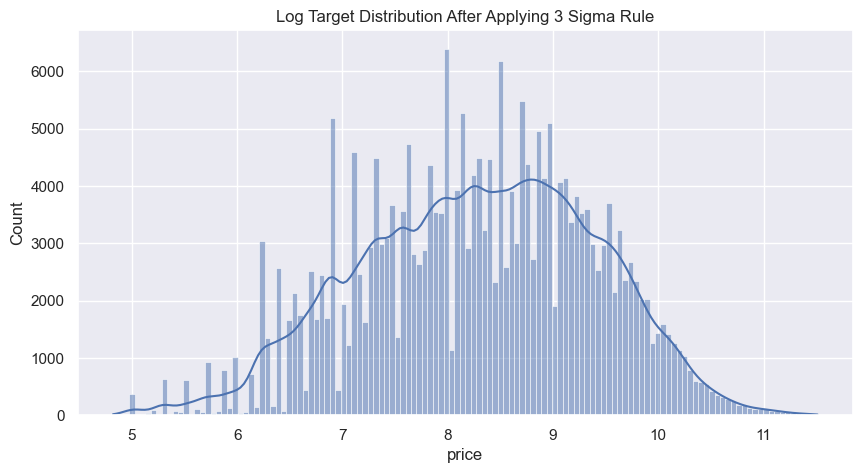

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x=data["price"], kde=True)
plt.title("Target Distribution")
plt.show()


plt.figure(figsize=(10, 5))
sns.histplot(data=data, x=np.log1p(data["price"]), kde=True)
plt.title("Log Target Distribution")
plt.show()

def three_sigma_rule(data:list):
    mean = np.mean(data)
    std_dev = np.std(data)
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    return [x for x in data if lower_bound <= x], lower_bound


filtered_data, lower_bound = three_sigma_rule(np.log1p(data['price']))

plt.figure(figsize=(10, 5))
sns.histplot(filtered_data, kde=True)
plt.title('Log Target Distribution After Applying 3 Sigma Rule')
plt.xlabel('price')
plt.show()

*Распределение у таргета выглядит как log нормальное. Убрали выбросы, используя правило 3 sigma rule для левой части распределения.*

In [10]:
# Остаить отфильтрованные данные

data['log_price'] = np.log1p(data['price'])
mask = data['log_price'] >= lower_bound
data = data.loc[mask]
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500,7.313887
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600,8.188967
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650,6.478510
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200,7.696667
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000,7.601402


Проведите исследование данных:
- Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
- Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
- Подумайте, какие трансформации признаков из известных вам будет уместно применить;
- Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.

Бренд:

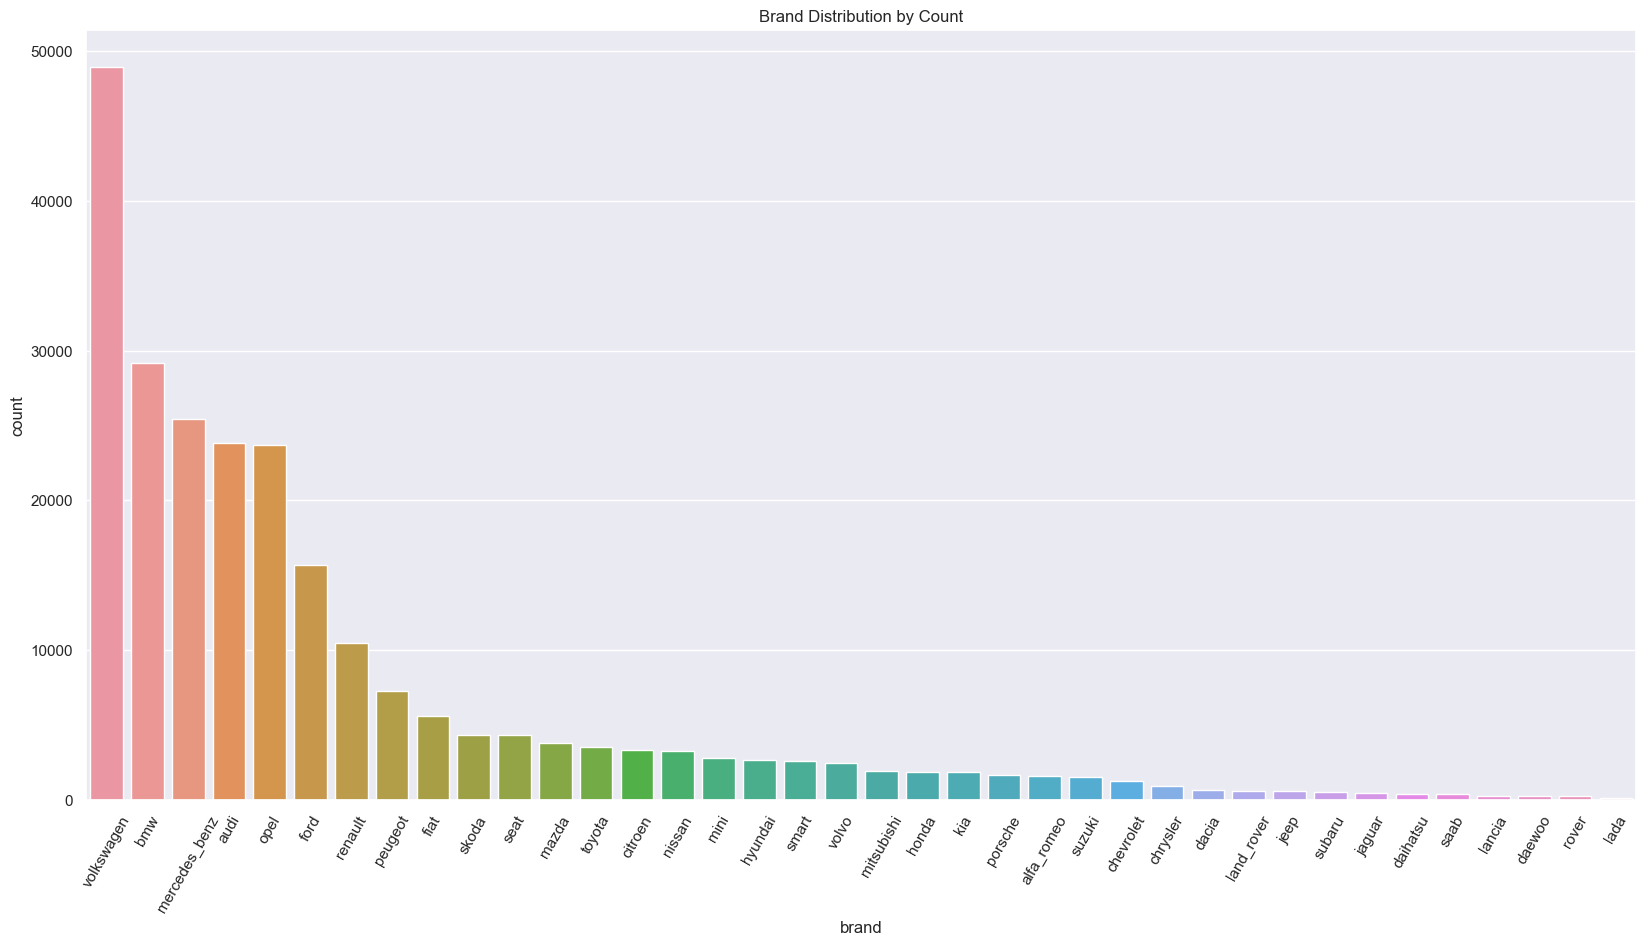

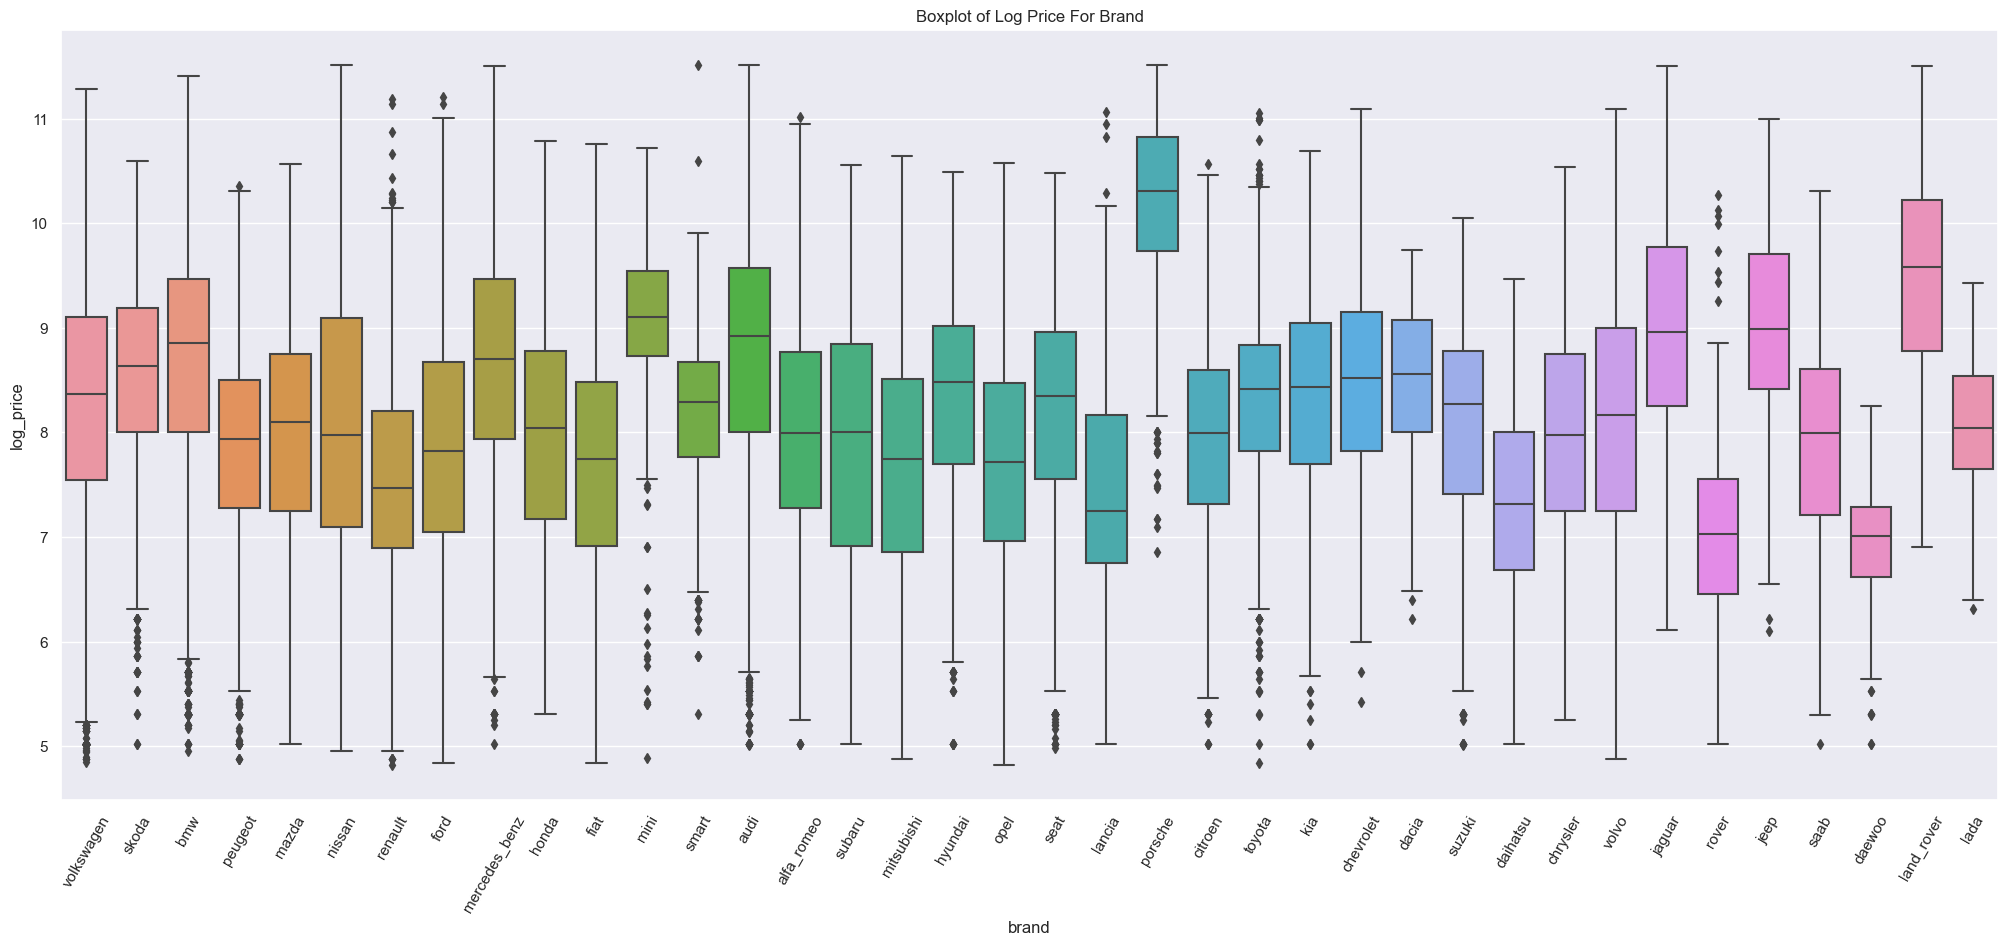

In [11]:
brand_counts = data["brand"].value_counts().reset_index()
brand_counts.columns = ["brand", "count"]
brand_counts = brand_counts.sort_values(by="count", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(data=brand_counts, x="brand", y="count")
plt.title("Brand Distribution by Count")
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(25, 10))
sns.boxplot(data=data, x="brand", y="log_price")
plt.title("Boxplot of Log Price For Brand")
plt.xticks(rotation=60)
plt.show()

Модель:

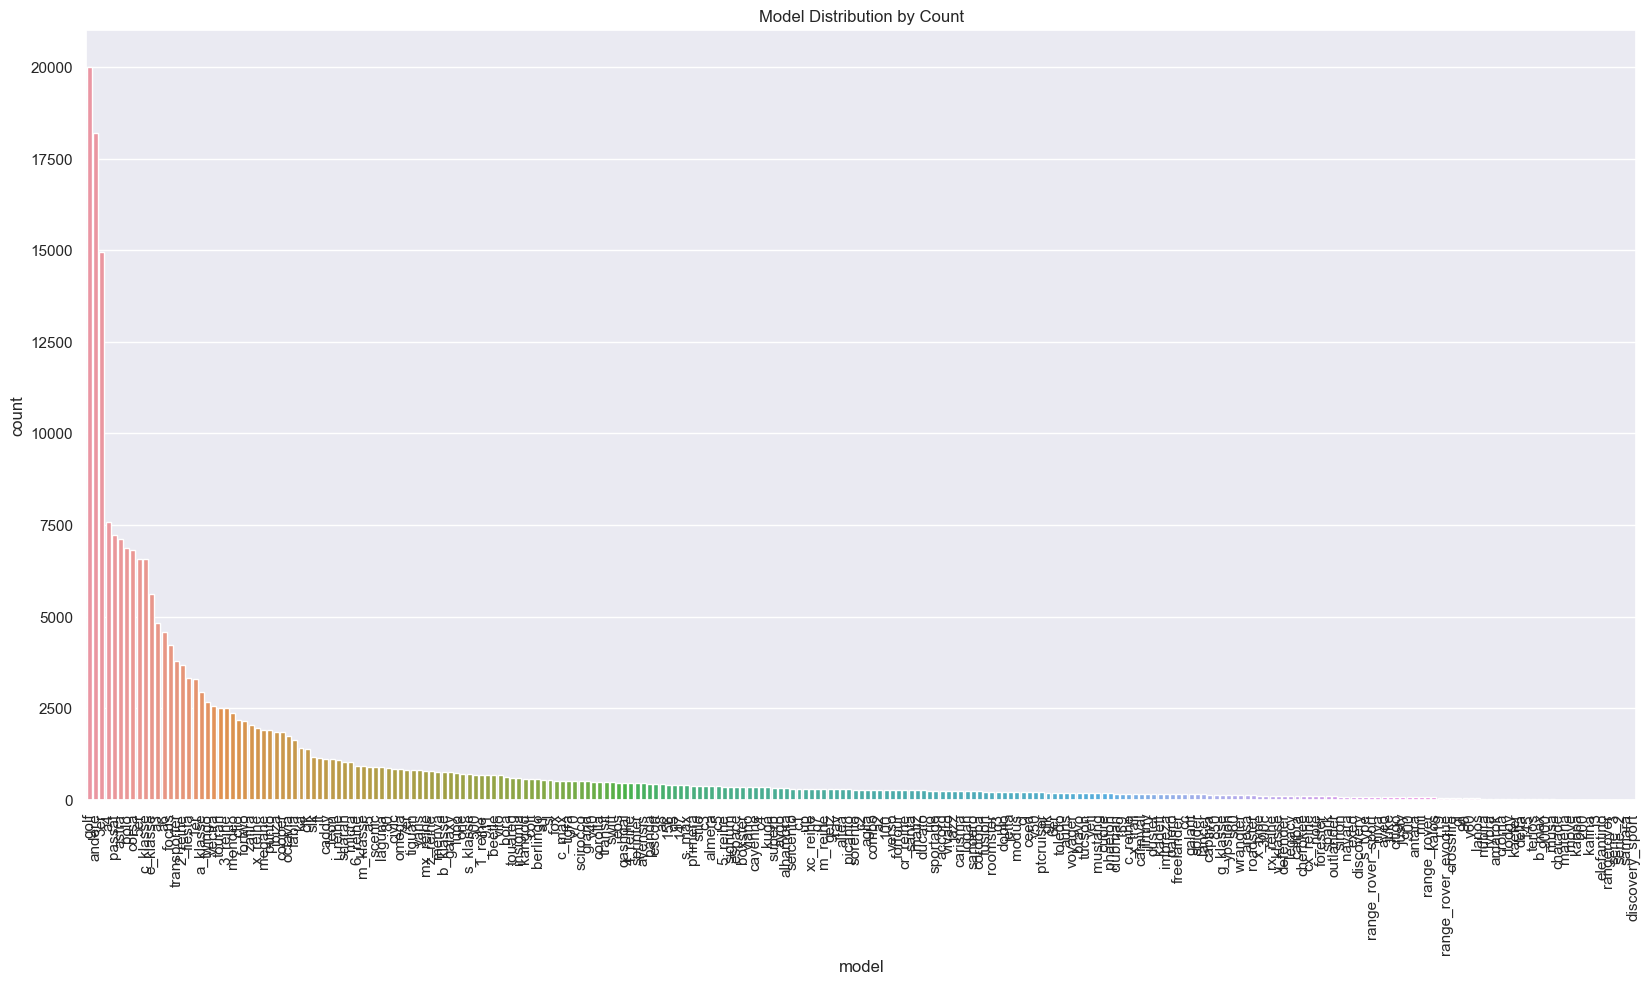

In [12]:
brand_counts = data["model"].value_counts().reset_index()
brand_counts.columns = ["model", "count"]
brand_counts = brand_counts.sort_values(by="count", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(data=brand_counts, x="model", y="count")
plt.title("Model Distribution by Count")
plt.xticks(rotation=90)
plt.show()

Типы транспортного средства:

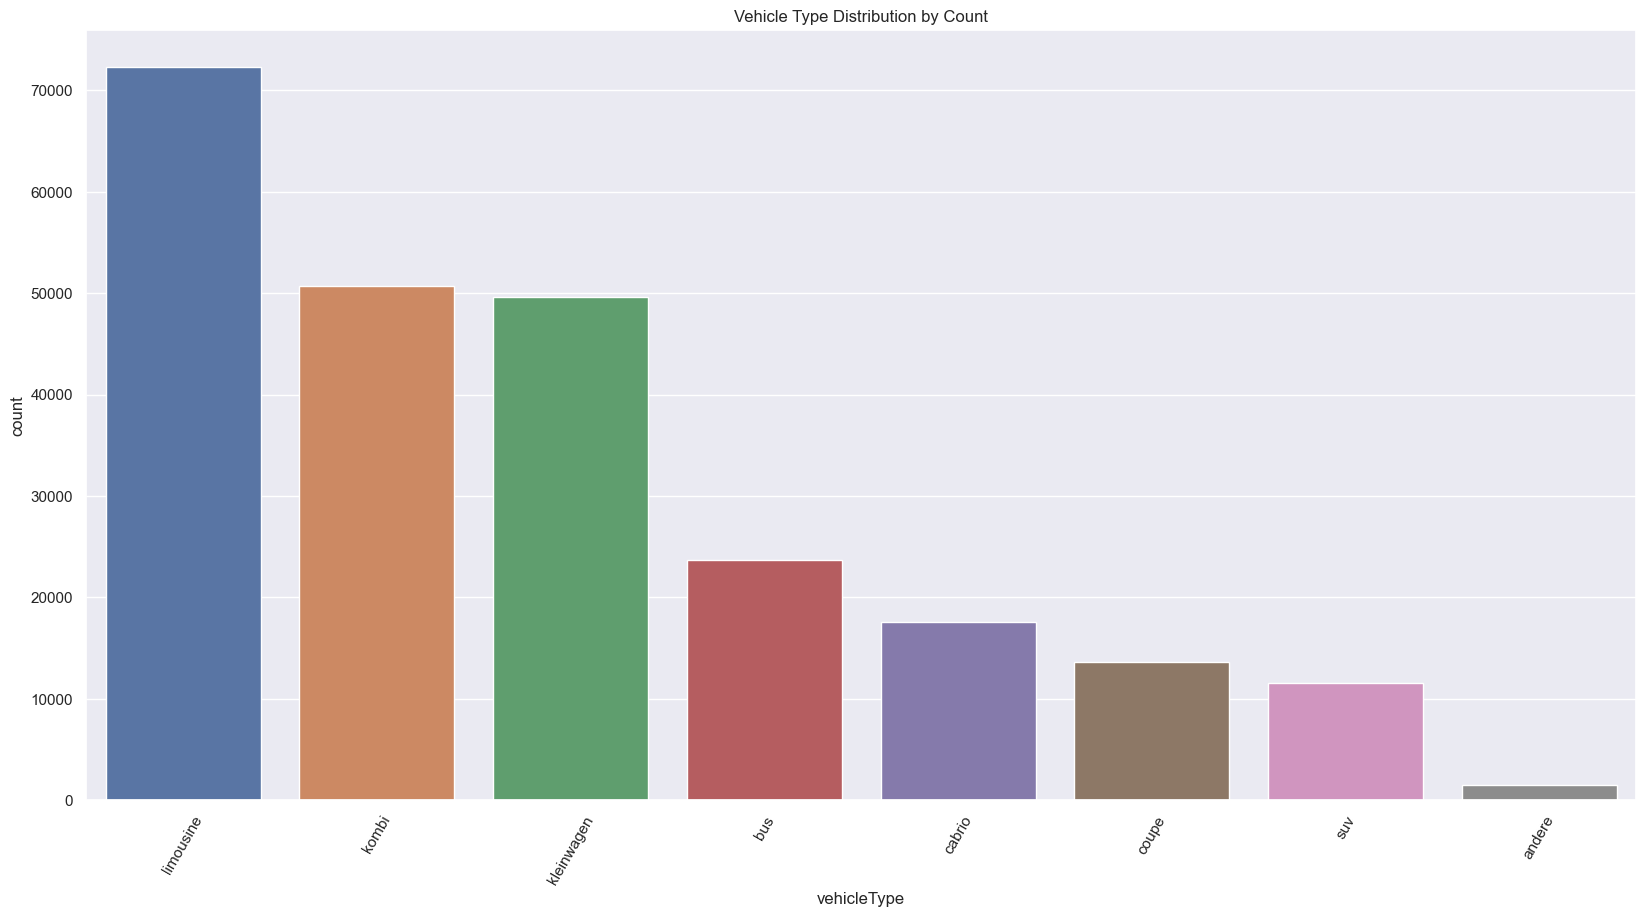

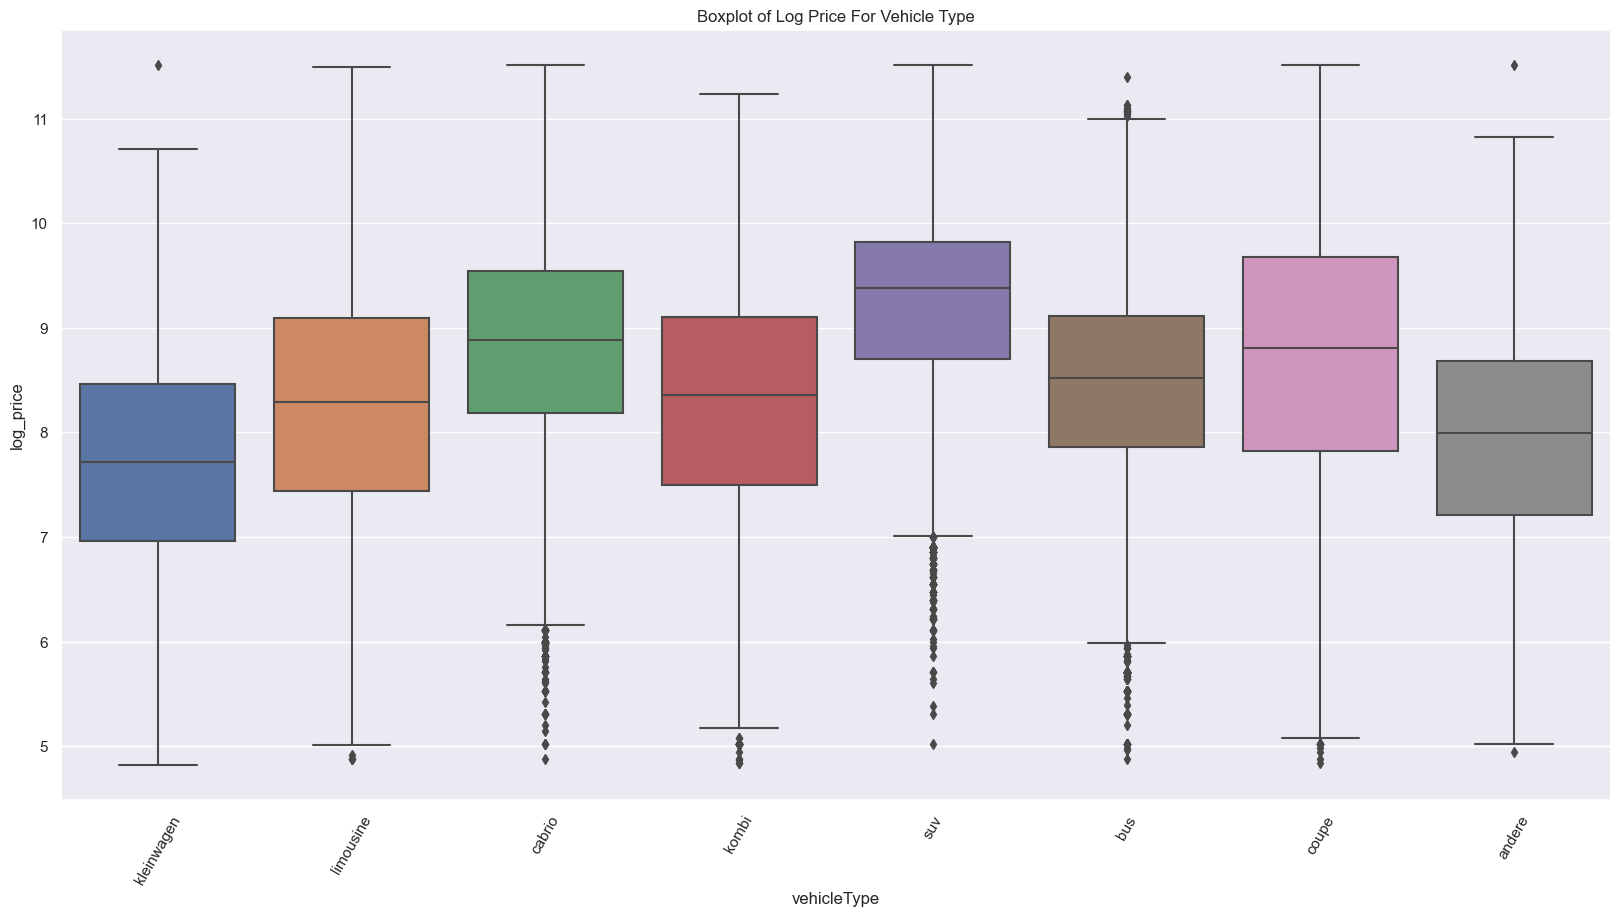

In [13]:
brand_counts = data["vehicleType"].value_counts().reset_index()
brand_counts.columns = ["vehicleType", "count"]
brand_counts = brand_counts.sort_values(by="count", ascending=False)

plt.figure(figsize=(20, 10))
sns.barplot(data=brand_counts, x="vehicleType", y="count")
plt.title("Vehicle Type Distribution by Count")
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(20, 10))
sns.boxplot(data=data, x="vehicleType", y="log_price")
plt.title("Boxplot of Log Price For Vehicle Type")
plt.xticks(rotation=60)
plt.show()

Трансмисиия:

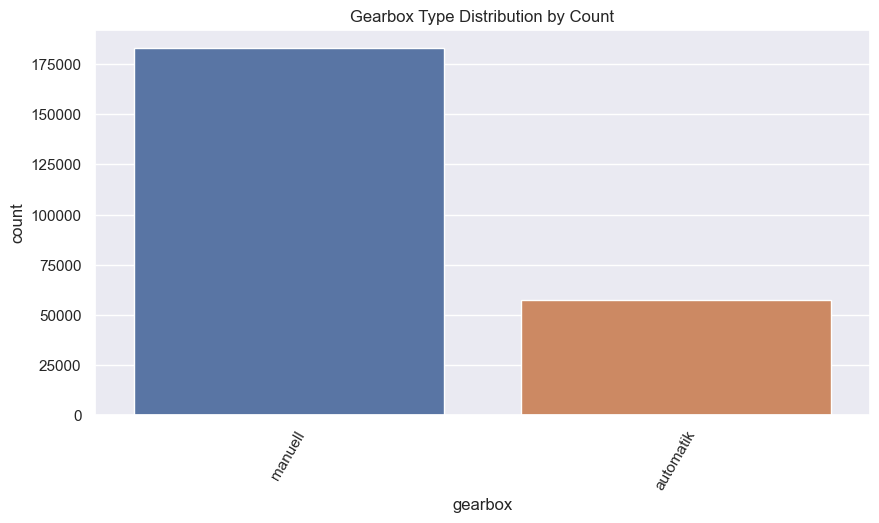

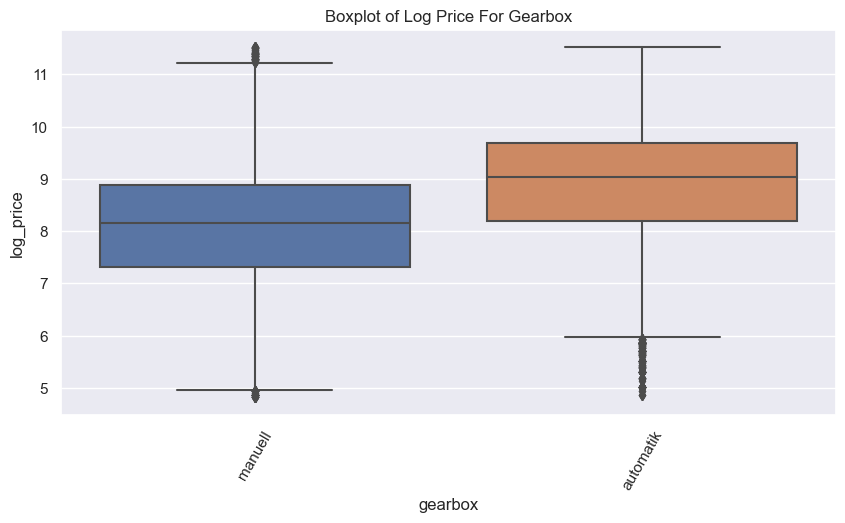

In [14]:
brand_counts = data["gearbox"].value_counts().reset_index()
brand_counts.columns = ["gearbox", "count"]
brand_counts = brand_counts.sort_values(by="count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=brand_counts, x="gearbox", y="count")
plt.title("Gearbox Type Distribution by Count")
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="gearbox", y="log_price")
plt.title("Boxplot of Log Price For Gearbox")
plt.xticks(rotation=60)
plt.show()

Вид топлива:

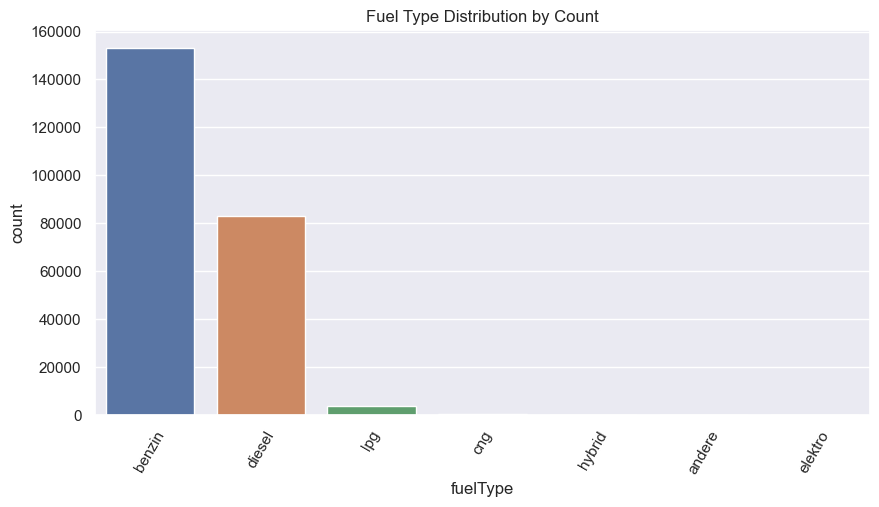

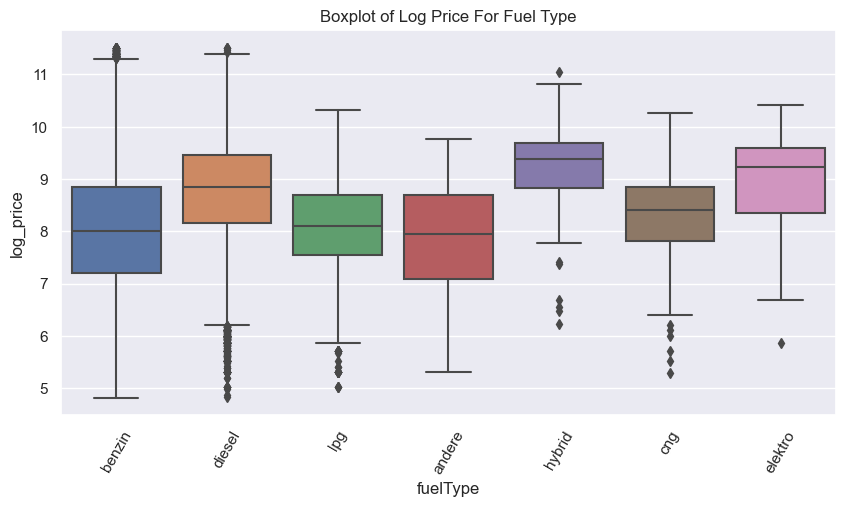

In [15]:
brand_counts = data["fuelType"].value_counts().reset_index()
brand_counts.columns = ["fuelType", "count"]
brand_counts = brand_counts.sort_values(by="count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=brand_counts, x="fuelType", y="count")
plt.title("Fuel Type Distribution by Count")
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="fuelType", y="log_price")
plt.title("Boxplot of Log Price For Fuel Type")
plt.xticks(rotation=60)
plt.show()

Неисправленная поломка:

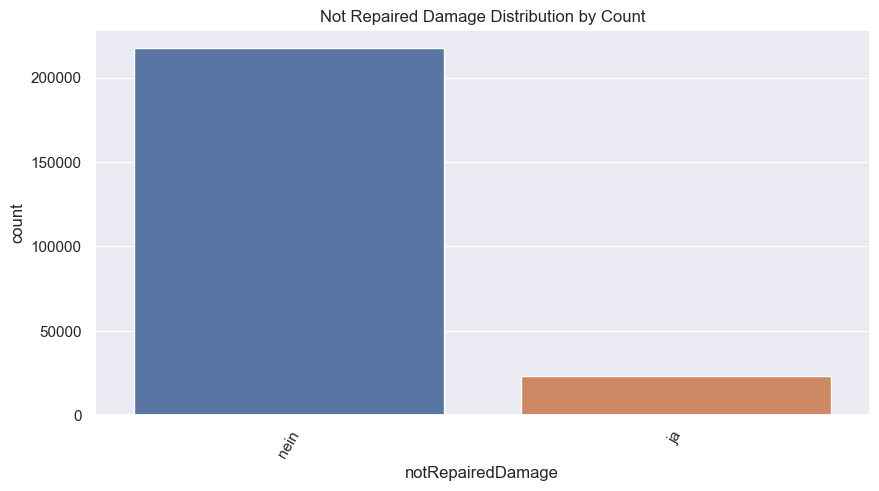

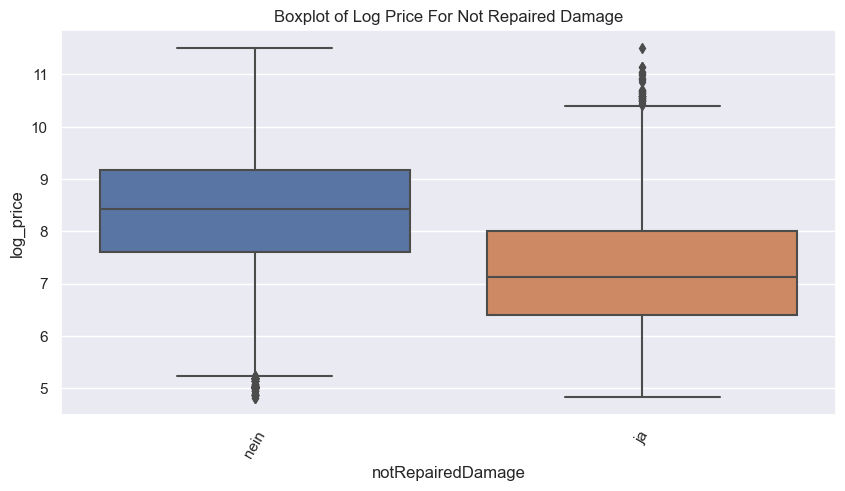

In [16]:
brand_counts = data["notRepairedDamage"].value_counts().reset_index()
brand_counts.columns = ["notRepairedDamage", "count"]
brand_counts = brand_counts.sort_values(by="count", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=brand_counts, x="notRepairedDamage", y="count")
plt.title("Not Repaired Damage Distribution by Count")
plt.xticks(rotation=60)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="notRepairedDamage", y="log_price")
plt.title("Boxplot of Log Price For Not Repaired Damage")
plt.xticks(rotation=60)
plt.show()

*Про категориальные признаки можно сказать следующее: все признаки имеют значение для цены автомобиля. Но в данных присутсвует большое количество различных моделей автомобилей, многие из которых далеко не популярны.*

Мощность двигателя:

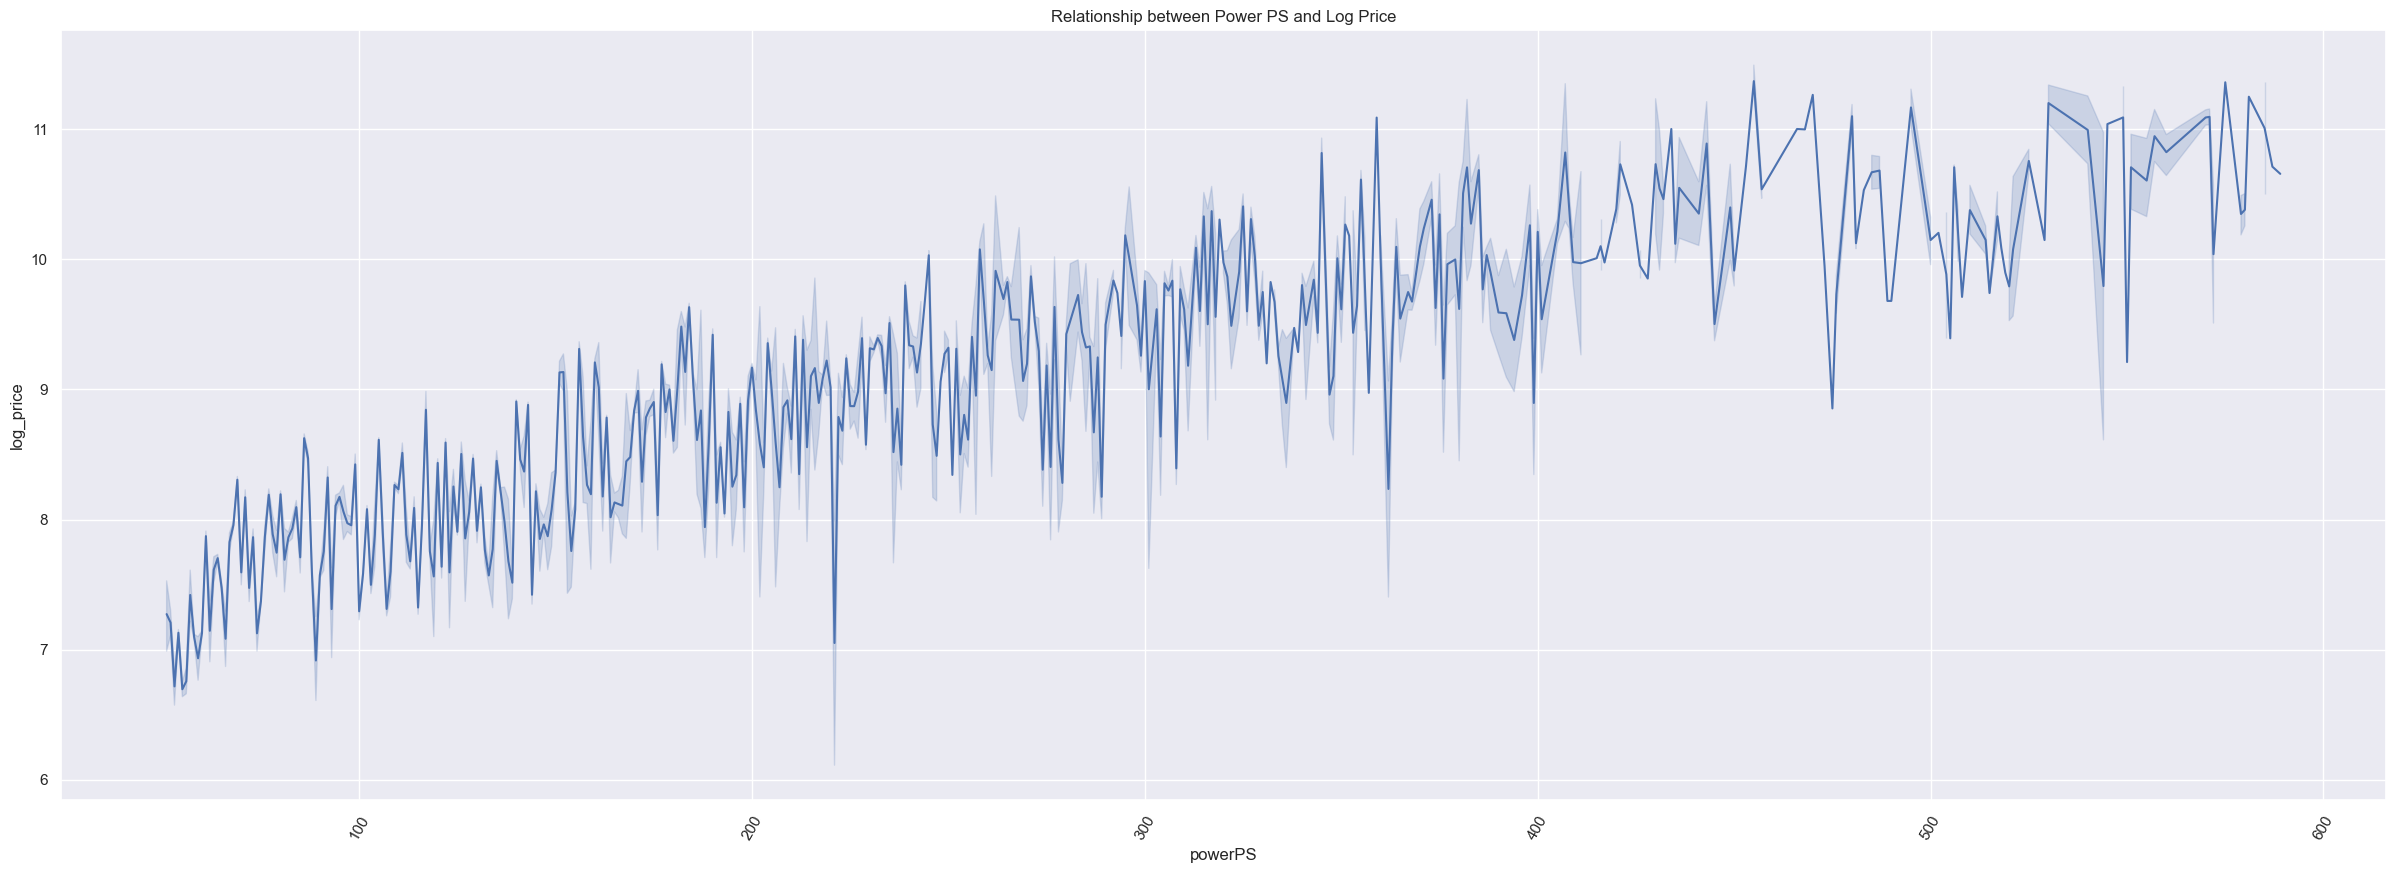

In [17]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=data, x="powerPS", y="log_price")
plt.title("Relationship between Power PS and Log Price")
plt.xticks(rotation=60)
plt.show()

Пробег:

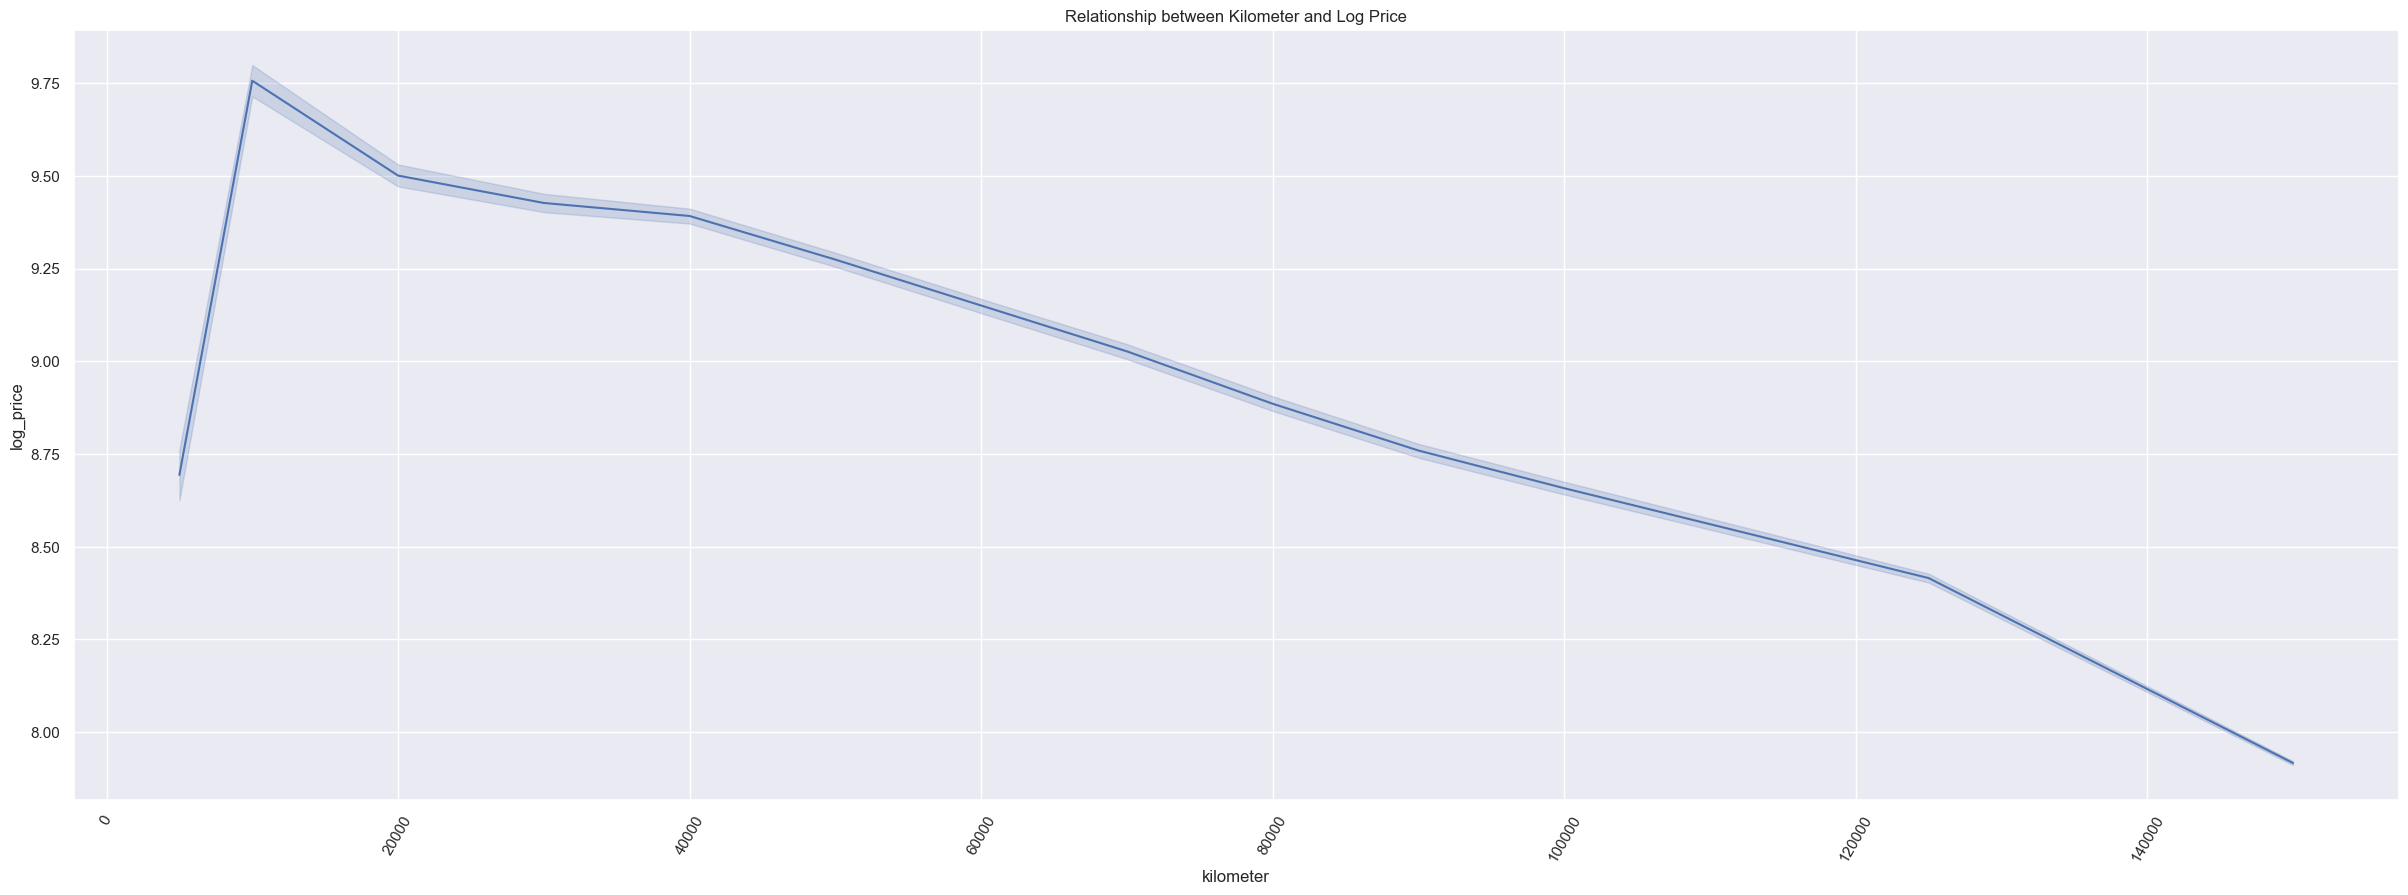

In [18]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=data, x="kilometer", y="log_price")
plt.title("Relationship between Kilometer and Log Price")
plt.xticks(rotation=60)
plt.show()

Возраст автомобиля:

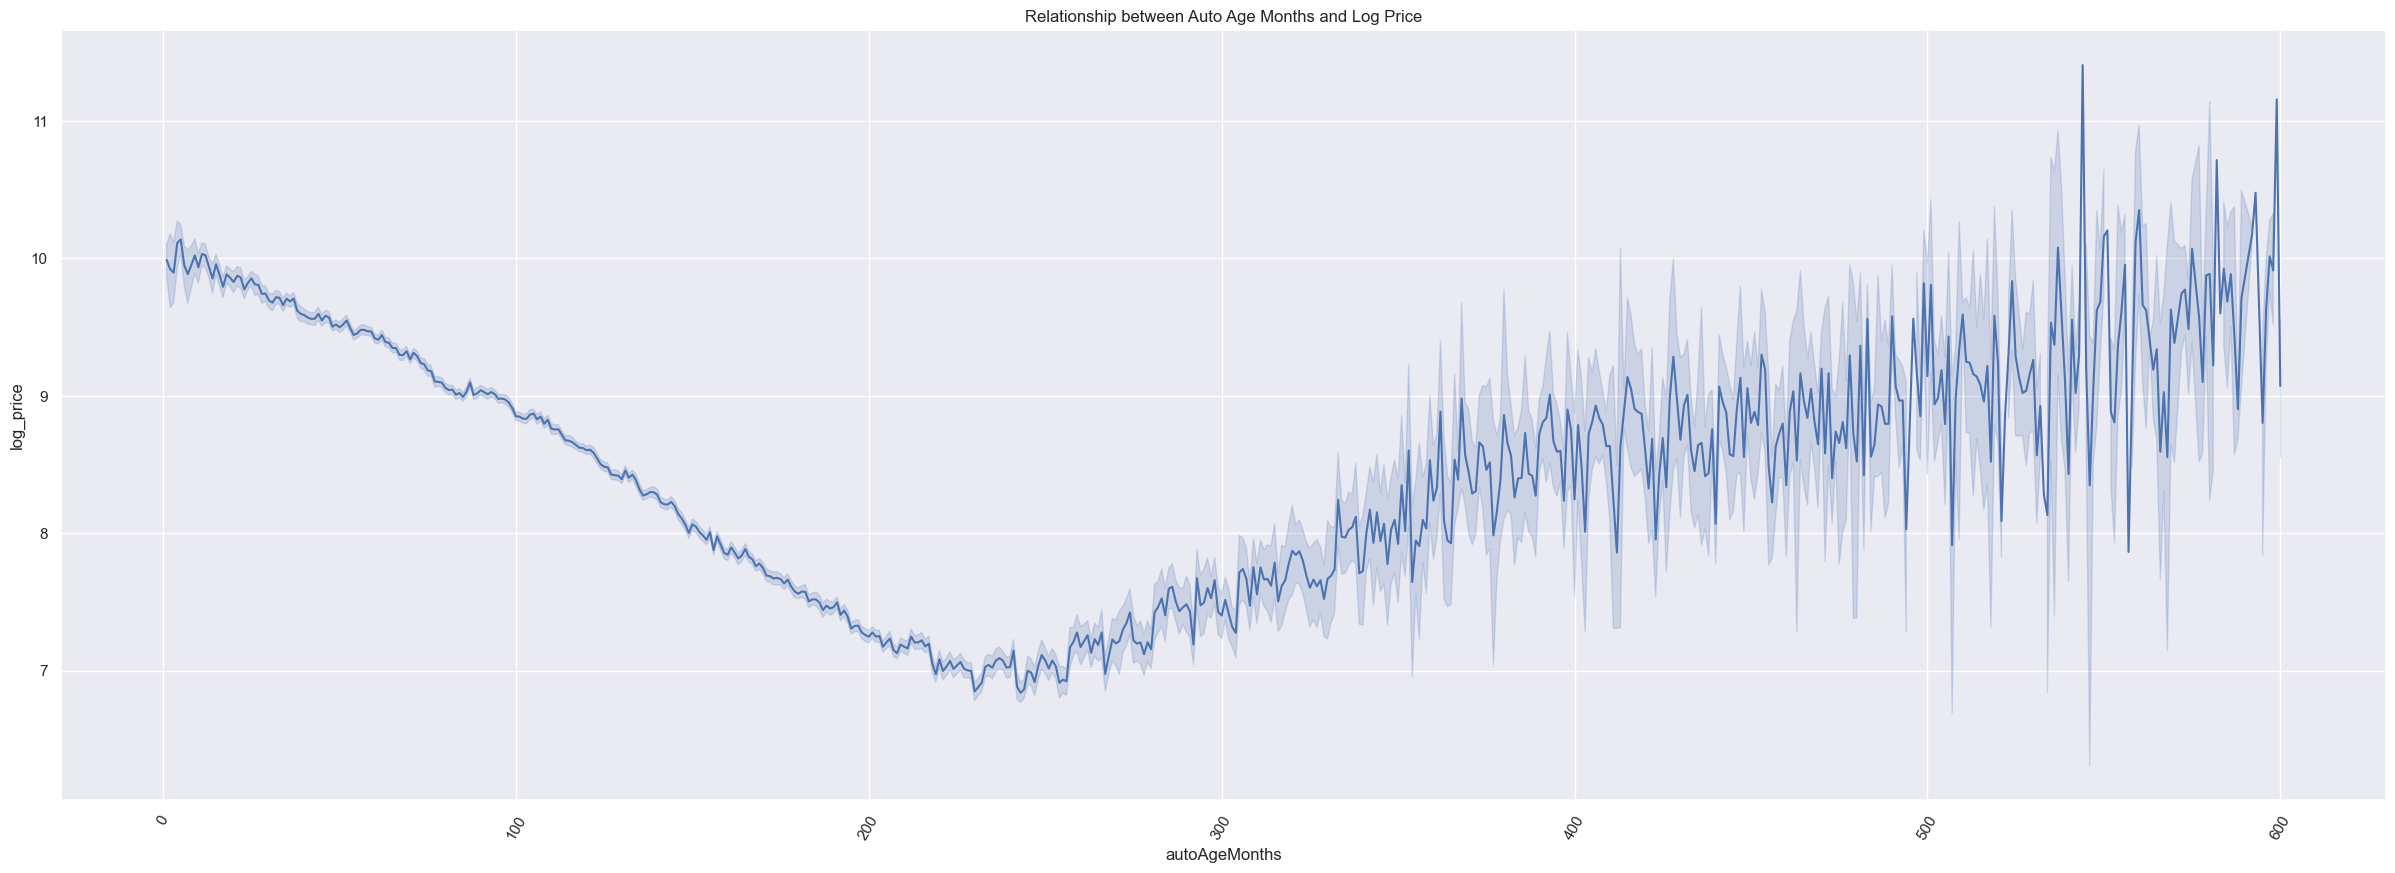

In [19]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=data, x="autoAgeMonths", y="log_price")
plt.title("Relationship between Auto Age Months and Log Price")
plt.xticks(rotation=60)
plt.show()

*Промчисловые признаки можно сказать следующее: все они так же вносят вклад в стоимость авто. Если больше лошадиных сил, то выше цена. Больше пробег -  меньше цена.
Препдположение о ситуацию на последнем графике такое: если атомобиль является коллекционным, то стоимость на него будет выше, даже при условии что ему много много лет.*

In [20]:
categorical = ['brand', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage', ]
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

In [21]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

total_samples = x.shape[0]
train_percent = (X_train.shape[0] / total_samples) * 100
val_percent = (X_val.shape[0] / total_samples) * 100
test_percent = (X_test.shape[0] / total_samples) * 100

print(f"Train: {train_percent:.2f}%")
print(f"Validation: {val_percent:.2f}%")
print(f"Test: {test_percent:.2f}%")


Train: 80.00%
Validation: 10.00%
Test: 10.00%


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [24]:
from sklearn.metrics import mean_squared_error

best_constant = y_train.mean()

print("Train RMSE with best constant = %.4f" % mean_squared_error(y_train, best_constant * np.ones(y_train.shape),
                                                                 squared=False))
print("Test RMSE with best constant = %.4f" % mean_squared_error(y_test, best_constant * np.ones(y_test.shape),
                                                                 squared=False))

Train RMSE with best constant = 1.1128
Test RMSE with best constant = 1.1164


In [25]:
from sklearn.metrics import r2_score, mean_squared_error


def fit_regression(descent_name: str, lambda_: int, culc_r2: bool):
  dimension = x.shape[1]

  descent_config = {
      'descent_name': descent_name,
      'kwargs': {
          'dimension': dimension,
          'lambda_': lambda_
      }
  }

  regression = LinearRegression(
      descent_config=descent_config
  )
  regression.fit(X_train, y_train)

  if culc_r2:
    y_train_predict = regression.predict(X_train)
    y_test_predict = regression.predict(X_test)
    return {'train_mse': mean_squared_error(y_train, y_train_predict, squared=True),
            'test_mse': mean_squared_error(y_test, y_test_predict, squared=True),
            'r2score': r2_score(y_test, y_test_predict),
            'iteration': len(regression.loss_history)}, regression.loss_history

  val_loss = regression.calc_loss(X_val, y_val)
  return val_loss


def get_params(descents):
  best_params = []
  for descent_name in descents:
    best_loss = 1e10
    best_lambda = 0
    for lambda_ in np.logspace(-5, 1, num=10):
      val_loss = fit_regression(descent_name, lambda_, False)
      if val_loss < best_loss:
        best_lambda = lambda_
        best_loss = val_loss
    best_params.append({'descent_name': descent_name, 'best_loss': best_loss, 'best_lambda': best_lambda})
  return best_params


def culc_metrics(params):
  metrics = {}
  history = {}
  for param in params:
    decent_name = param.get('descent_name')
    loss = param.get('best_loss')
    lambda_ = param.get('best_lambda')
    metrics[decent_name], loss_history = fit_regression(decent_name, lambda_, True)
    history[decent_name] = loss_history
  return metrics, history


params = get_params(['full', 'stochastic', 'momentum', 'adam'])
print('Лучшие параметры: ')
pd.DataFrame(params)

Лучшие параметры: 


,descent_name,best_loss,best_lambda
0,full,0.370255,0.464159
1,stochastic,0.357818,0.464159
2,momentum,0.318208,0.464159
3,adam,0.293468,2.154435


In [26]:
metrics, history = culc_metrics(params)
print('Таблица сравнений:')
pd.DataFrame(metrics)

Таблица сравнений:


,full,stochastic,momentum,adam
train_mse,0.373262,0.355344,0.327399,0.298854
test_mse,0.367529,0.350671,0.326923,0.297603
r2score,0.705124,0.718649,0.737703,0.761227
iteration,41.000000,143.000000,84.000000,83.000000


### Задание 5.2. Сравнение методов (1 балла)

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

Сделаем общий график

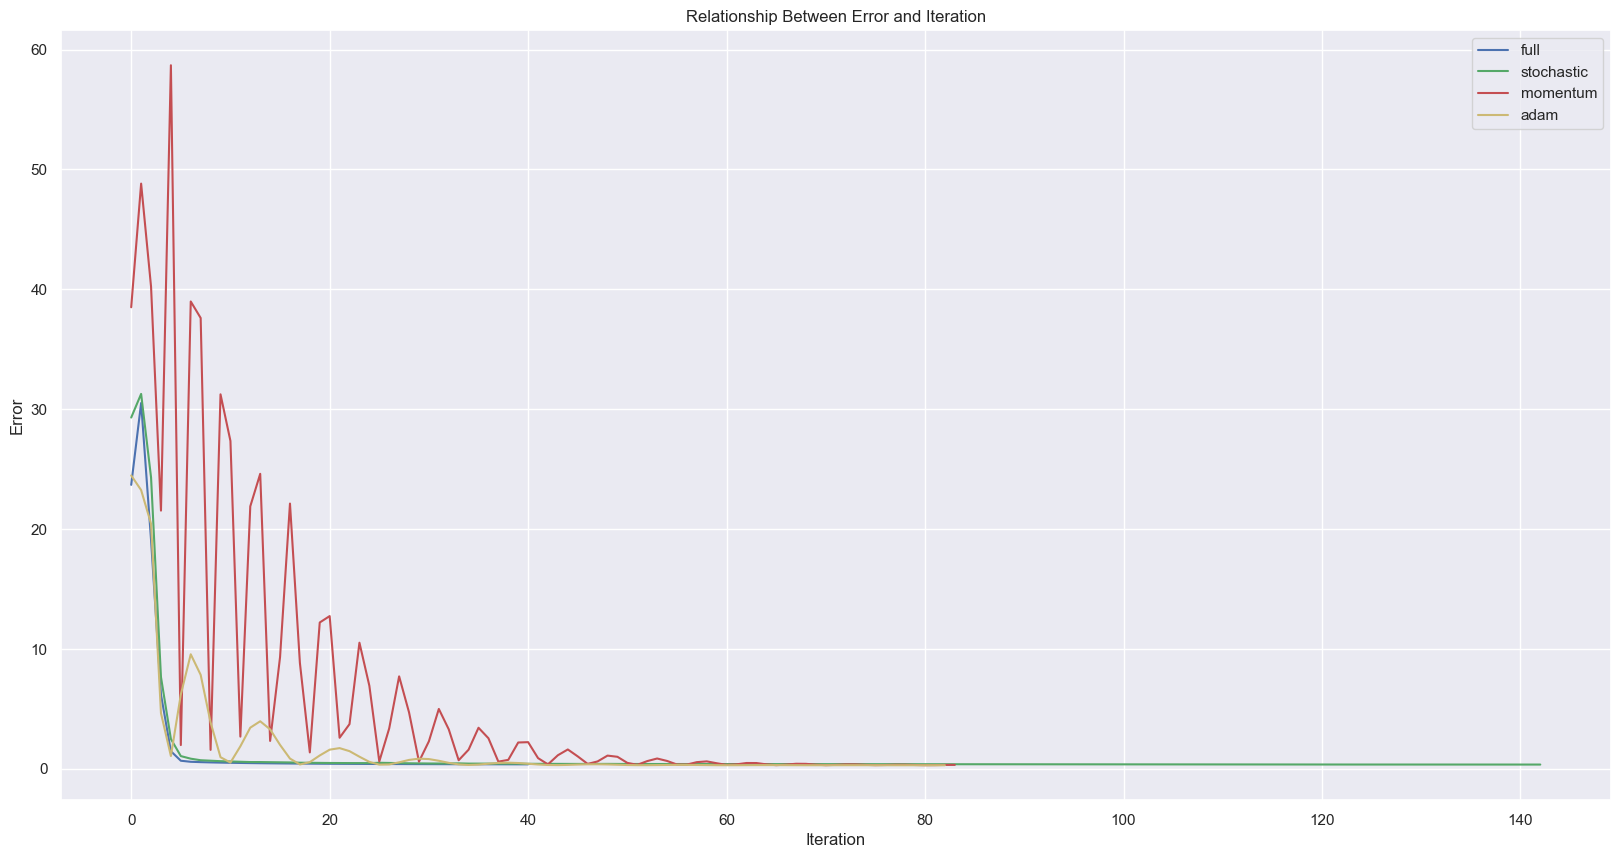

In [27]:
def plot():
  plt.figure(figsize=(20, 10))

  colors = ['b', 'g', 'r', 'y']

  for i, (key, values) in enumerate(history.items()):
      sns.lineplot(x=range(len(values)), y=values, label=key, color=colors[i % len(colors)])

  plt.grid(True)
  plt.title("Relationship Between Error and Iteration")
  plt.xlabel('Iteration')
  plt.ylabel('Error')
  plt.show()

plot()

Нарисуем каждый график по отдельности.

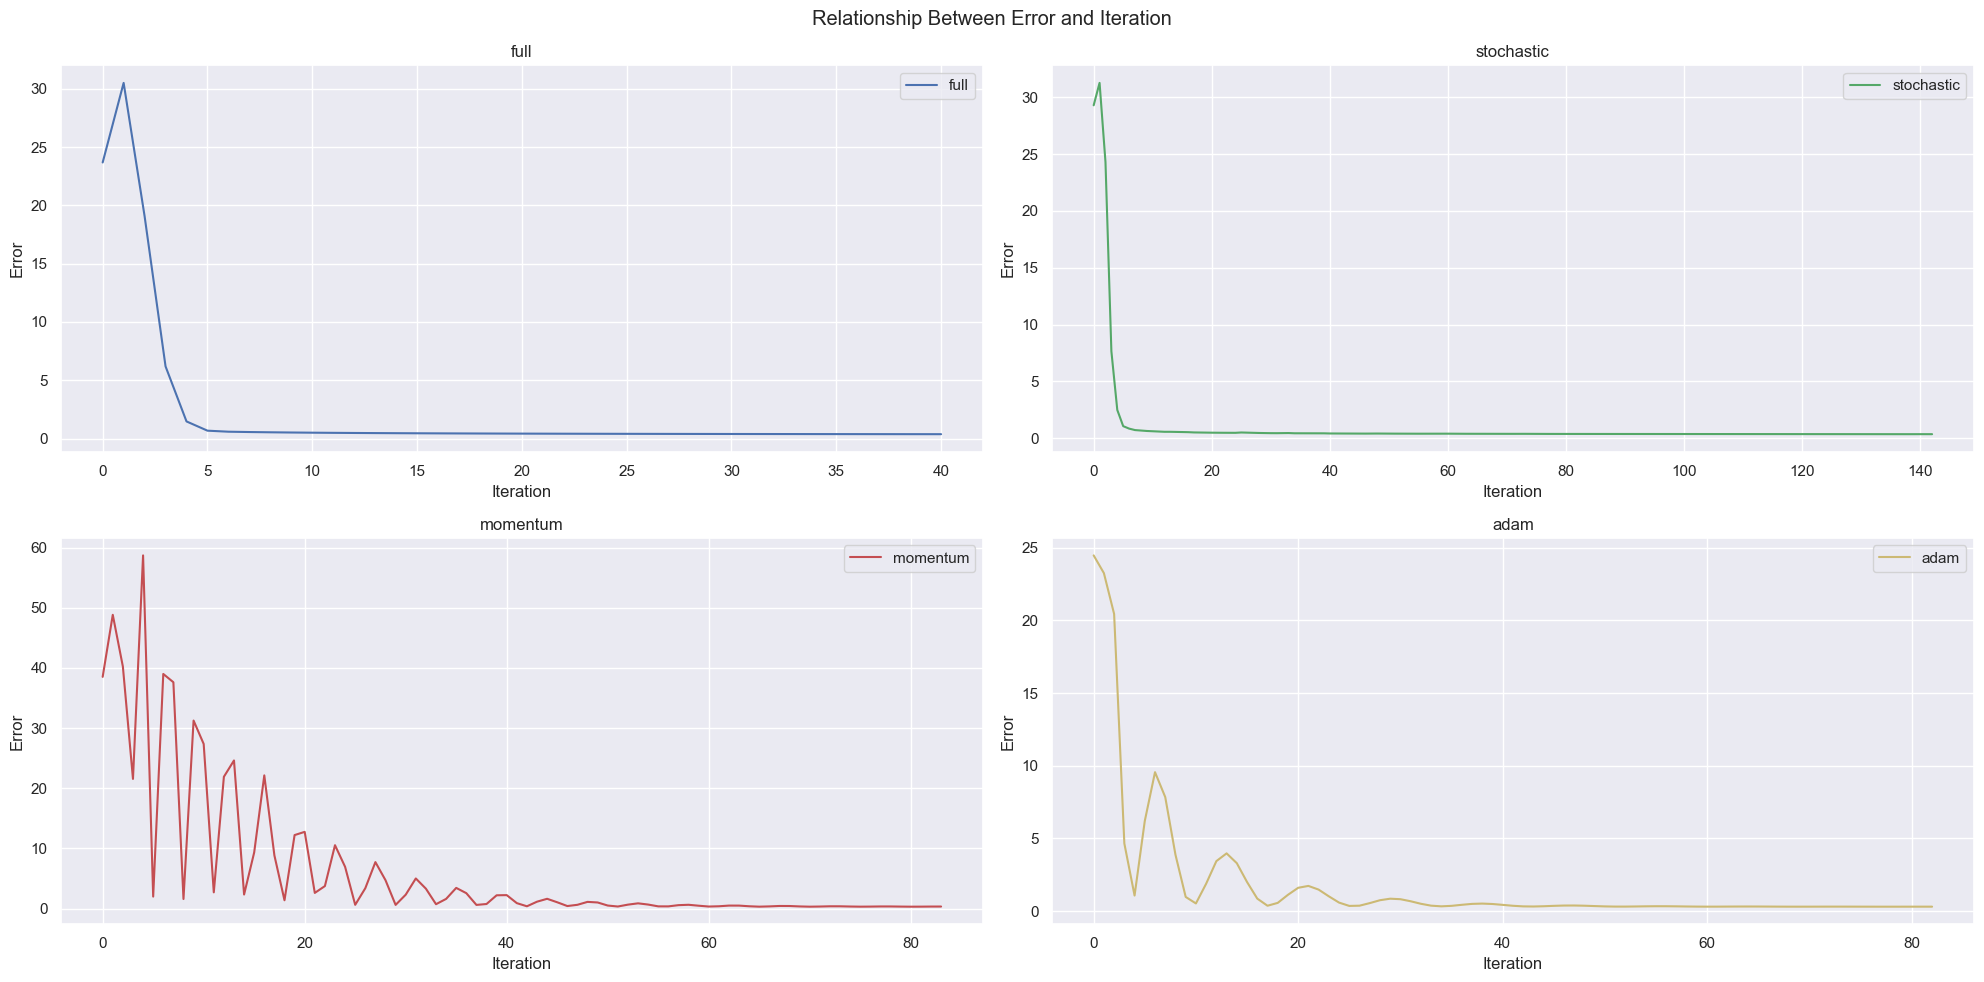

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

colors = ['b', 'g', 'r', 'y']

for i, (key, values) in enumerate(history.items()):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(len(values)), y=values, label=key, color=colors[i % len(colors)], ax=axes[row, col])
    axes[row, col].set_title(key)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Error')

for ax in axes.flat:
    ax.grid(True)

fig.suptitle("Relationship Between Error and Iteration")

plt.tight_layout()

plt.show()


*Меньше всего итераций потребовалось вальнильному спуску, больше всего итераций стахостическому спуску. Лучший $R^2$ у Adam. Ошибка у ванильного падает примерно с такой же скоростью как у стахостического (видно на общем графике). Ошибку у momentum заметно трясет сходится он примерно на стольких же операциях как и Adam.*

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска.

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [29]:
import time


def stochastic_descent_regression(descent_name: str, lambda_: int, batch_size):
  dimension = x.shape[1]

  descent_config = {
      'descent_name': descent_name,
      'kwargs': {
          'dimension': dimension,
          'lambda_': lambda_,
          'batch_size': batch_size
      }
  }

  regression = LinearRegression(
      descent_config=descent_config
  )
  regression.fit(X_train, y_train)

  return len(regression.loss_history)


batch_sizes = np.arange(5, 500, 10)
stochastic_params = params[1]

mean_iterations = []
mean_time = []
for batch_size in batch_sizes:
  batch_interation = []
  start_time = time.time()
  for k in range (10):
    batch_interation.append(stochastic_descent_regression(stochastic_params.get('descent_name'), stochastic_params.get('best_lambda'), batch_size))
  mean_time.append(abs(start_time - time.time()) / 10)
  mean_iterations.append(np.mean(batch_interation))



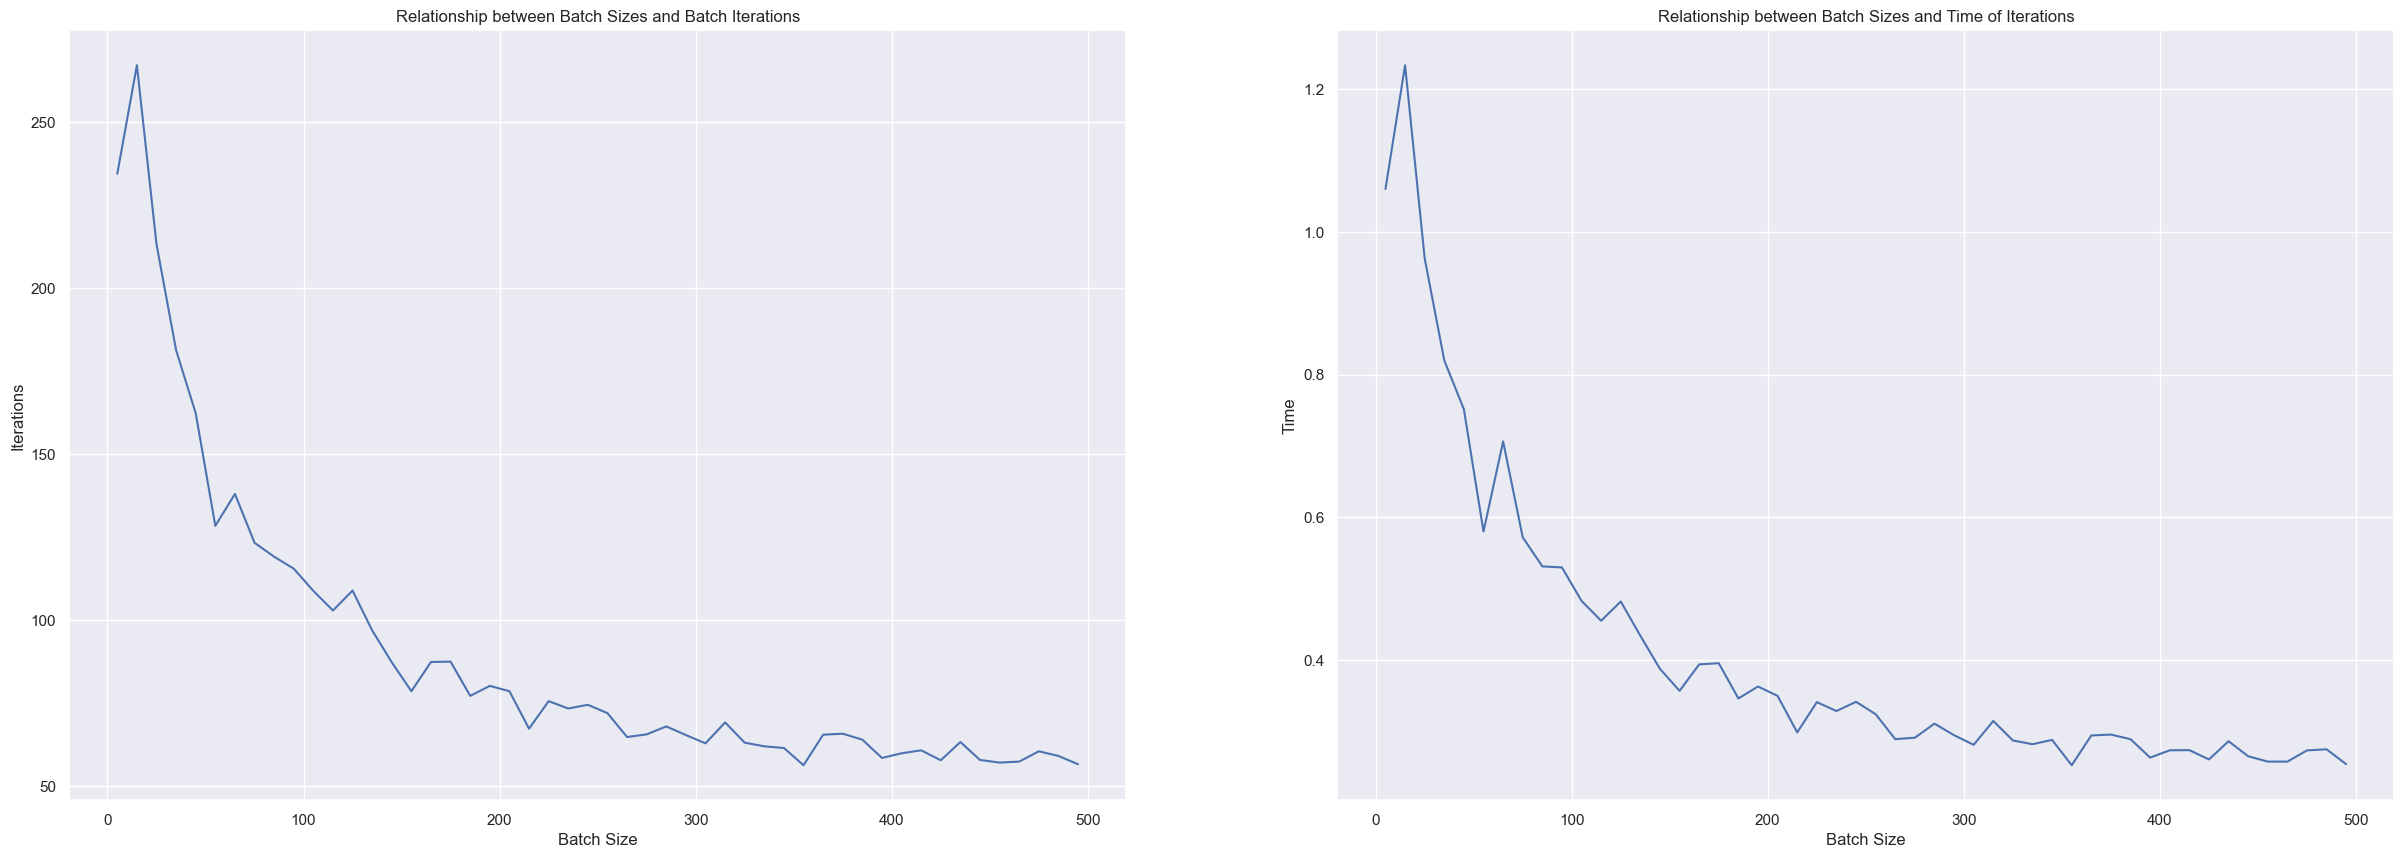

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

sns.lineplot(x=batch_sizes, y=mean_iterations, ax=axes[0])
axes[0].set_title("Relationship between Batch Sizes and Batch Iterations")
axes[0].set_xlabel('Batch Size')
axes[0].set_ylabel('Iterations')

sns.lineplot(x=batch_sizes, y=mean_time, ax=axes[1])
axes[1].set_title("Relationship between Batch Sizes and Time of Iterations")
axes[1].set_xlabel('Batch Size')
axes[1].set_ylabel('Time')

plt.show()

*Вывод нагляден: чем меньше batсh size, тем дольше мы сходимся. И наоборот, чем больше batсh size, тем меньше времени нам требуется.
Ради интереса я провел эксперимент, чтобы посмотреть, что будет просиходить с временем и итерациями при батче размера >= 500 и том же количесве запусков:*

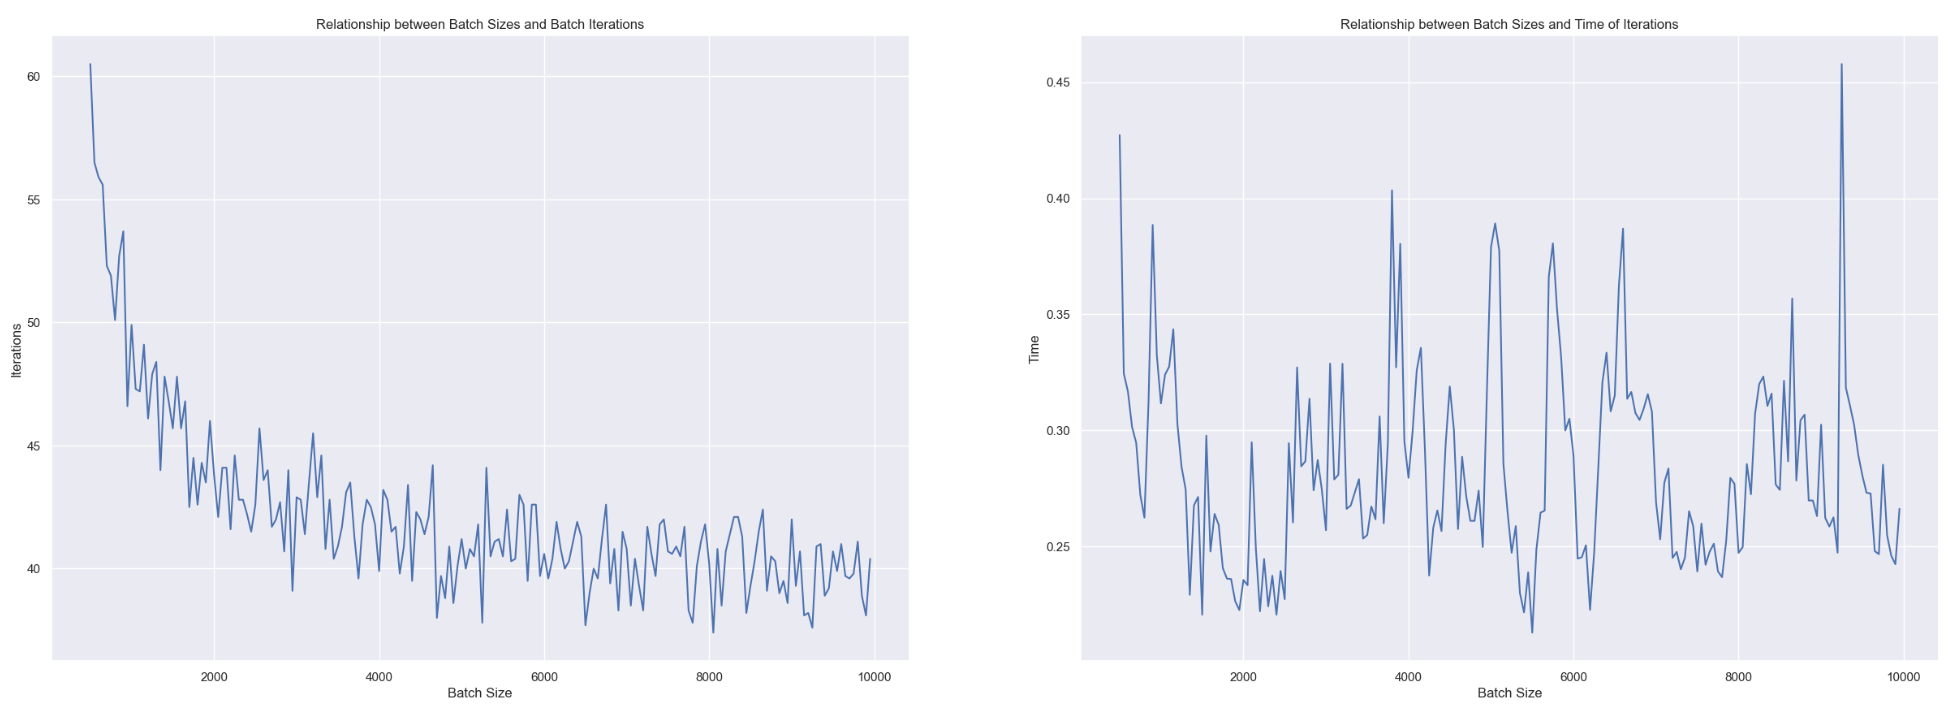

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/96080218/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [45]:
from sklearn.metrics import r2_score, mean_squared_error
from tqdm.auto import tqdm

def fit_regression(descent_name: str, lambda_: int, mu: int, culc_r2: bool):
  dimension = x.shape[1]

  descent_config = {
      'descent_name': descent_name,
      'regularized': True,
      'kwargs': {
          'dimension': dimension,
          'lambda_': lambda_,
          'mu': mu
      }
  }

  regression = LinearRegression(
      descent_config=descent_config
  )
  regression.fit(X_train, y_train)

  if culc_r2:
    y_train_predict = regression.predict(X_train)
    y_test_predict = regression.predict(X_test)
    return {'train_mse': mean_squared_error(y_train, y_train_predict, squared=True),
            'test_mse': mean_squared_error(y_test, y_test_predict, squared=True),
            'r2score': r2_score(y_test, y_test_predict),
            'iteration': len(regression.loss_history)}, regression.loss_history

  val_loss = regression.calc_loss(X_val, y_val)
  return val_loss


def get_params(descents, params):
  best_params = []
  for descent_name in descents:
    i = 0
    best_loss = 1e10
    best_mu = 0
    lambda_ = params[i]['best_lambda']
    i += 1
    best_lambda = lambda_
    for mu in np.logspace(-4, 0.3, 5):
        val_loss = fit_regression(descent_name, lambda_, mu, False)
        if val_loss < best_loss:
          best_mu = mu
          best_loss = val_loss
    best_params.append({'descent_name': descent_name, 'best_loss': best_loss, 'best_lambda': best_lambda, 'best_mu': best_mu})
  return best_params


def culc_metrics(params):
  metrics = {}
  history = {}
  for param in params:
    decent_name = param.get('descent_name')
    loss = param.get('best_loss')
    lambda_ = param.get('best_lambda')
    mu = param.get('best_mu')
    metrics[decent_name], loss_history = fit_regression(decent_name, lambda_, mu, True)
    history[decent_name] = loss_history
  return metrics, history


params_reg = get_params(['full', 'stochastic', 'momentum', 'adam'], params)
print('Лучшие параметры: ')
pd.DataFrame(params_reg)

Лучшие параметры: 


,descent_name,best_loss,best_lambda,best_mu
0,full,0.407255,0.464159,0.000100
1,stochastic,0.348965,0.464159,0.001189
2,momentum,0.302683,0.464159,0.000100
3,adam,0.298365,0.464159,0.001189


In [46]:
metrics_reg, history_reg = culc_metrics(params_reg)

print('Таблица сравнений метрик после регуляризации:')
display(pd.DataFrame(metrics_reg))
print('\n')
print('Таблица сравнений метрик до регуляризации:')
display(pd.DataFrame(metrics))

Таблица сравнений метрик после регуляризации:


,full,stochastic,momentum,adam
train_mse,0.395184,0.343815,0.309582,0.302033
test_mse,0.390239,0.340849,0.308003,0.301071
r2score,0.686903,0.726529,0.752883,0.758444
iteration,53.000000,220.000000,94.000000,85.000000




Таблица сравнений метрик до регуляризации:


,full,stochastic,momentum,adam
train_mse,0.373262,0.355344,0.327399,0.298854
test_mse,0.367529,0.350671,0.326923,0.297603
r2score,0.705124,0.718649,0.737703,0.761227
iteration,41.000000,143.000000,84.000000,83.000000


*Видим, количество итераций для сходимости подросло, потому что добавилось условие на регуляризацию - время сходимости увеличилось. Ошибка на обучающей стала немного больше. Ошибка на тестовой уменьшилась, потому что стали меньше переобучаться.*

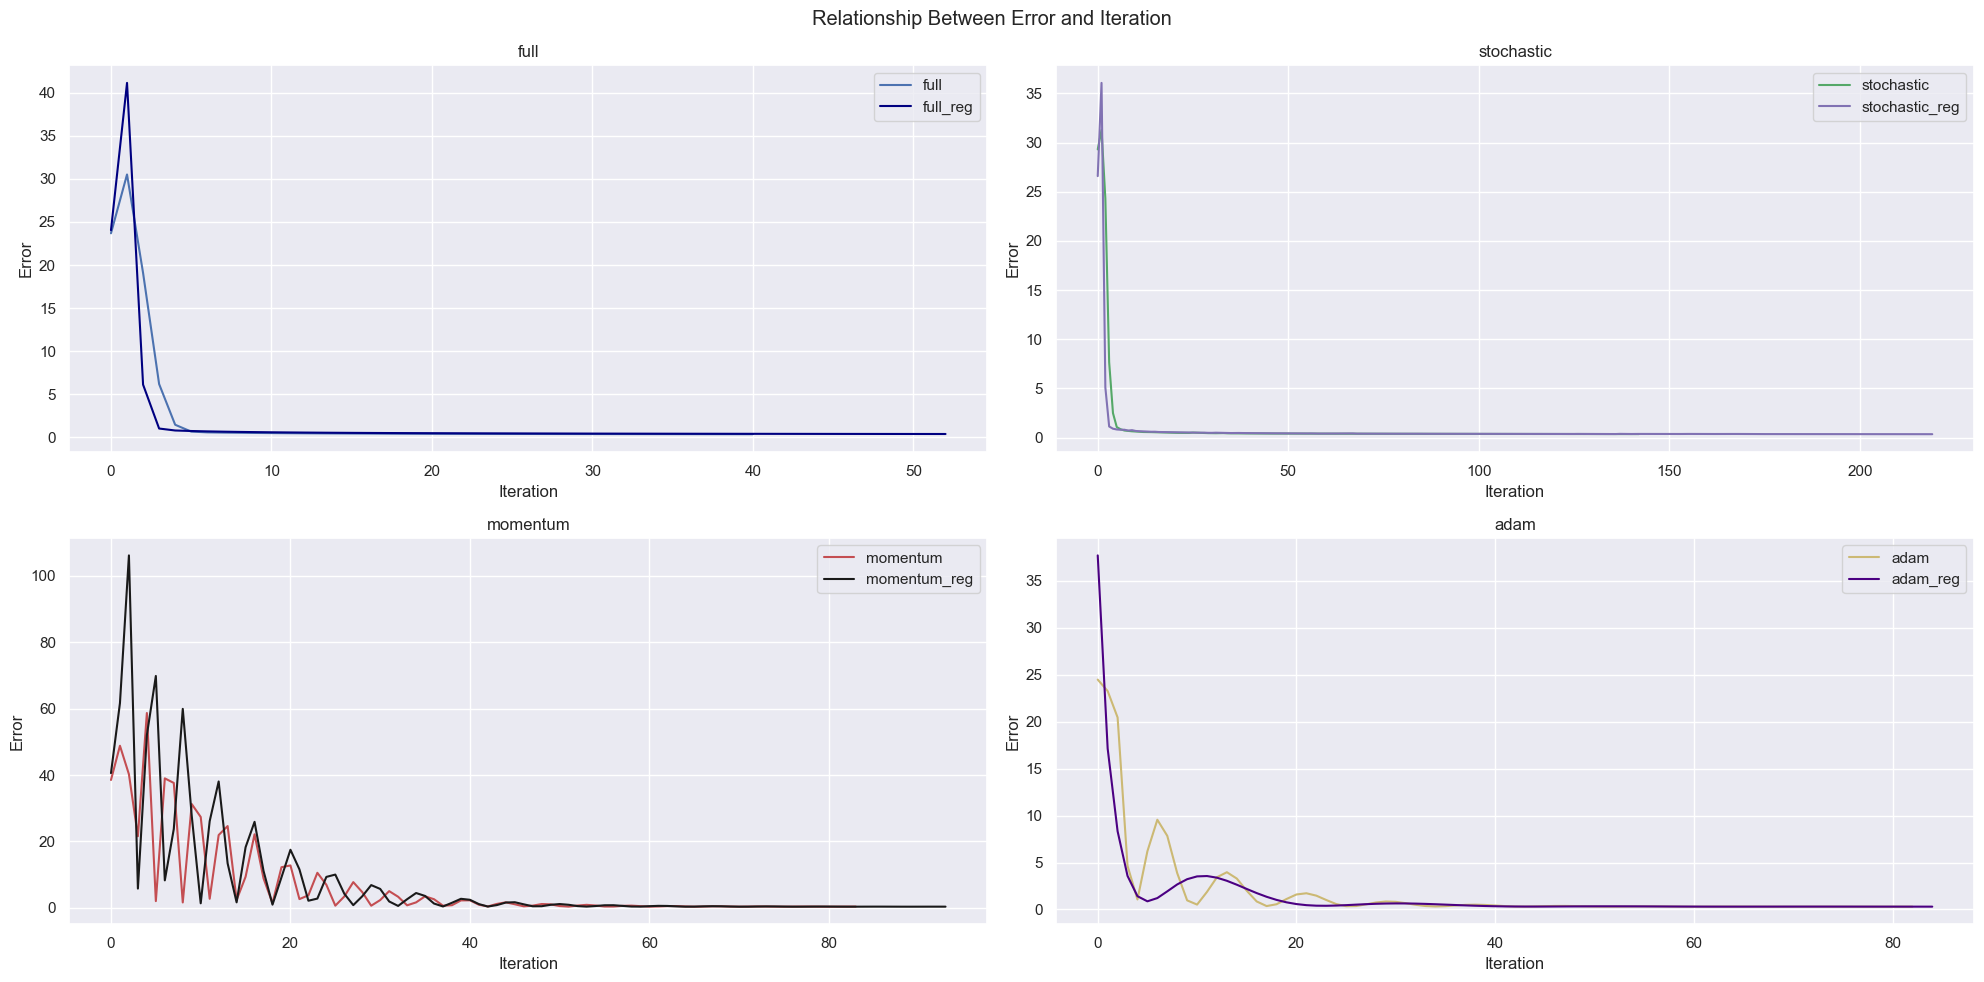

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

colors = ['b', 'g', 'r', 'y']
colors_reg = ['navy', 'm', 'k', 'indigo']


for i, (key, values) in enumerate(history.items()):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(len(values)), y=values, label=key, color=colors[i % len(colors)], ax=axes[row, col])
    axes[row, col].set_title(key)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Error')

for i, (key, values) in enumerate(history_reg.items()):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(len(values)), y=values, label=key + '_reg', color=colors_reg[i % len(colors_reg)], ax=axes[row, col])
    axes[row, col].set_title(key)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Error')

fig.suptitle("Relationship Between Error and Iteration")

plt.tight_layout()
plt.show()


*По графикам видно, что, либо ошибка падает быстрее, либо примерно так же.*

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
\nabla_w L(y, a) = x\tanh(a - y)
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [48]:
from sklearn.metrics import r2_score, mean_squared_error
from tqdm.auto import tqdm
from descents import LossFunction


def fit_regression(descent_name: str, lambda_: int, culc_r2: bool):
  dimension = x.shape[1]

  descent_config = {
      'descent_name': descent_name,
      'kwargs': {
          'dimension': dimension,
          'lambda_': lambda_,
          'loss_function': LossFunction.LogCosh
      }
  }

  regression = LinearRegression(
      descent_config=descent_config
  )
  regression.fit(X_train, y_train)

  if culc_r2:
    y_train_predict = regression.predict(X_train)
    y_test_predict = regression.predict(X_test)
    return {'train_log_cosh': mean_squared_error(y_train, y_train_predict, squared=True),
            'test_log_cosh': mean_squared_error(y_test, y_test_predict, squared=True),
            'r2score': r2_score(y_test, y_test_predict),
            'iteration': len(regression.loss_history)}, regression.loss_history

  val_loss = regression.calc_loss(X_val, y_val)
  return val_loss


def get_params(descents):
  best_params = []
  for descent_name in descents:
    best_loss = 1e10
    best_lambda = 0
    best_mu = 0
    for lambda_ in tqdm(np.logspace(-5, 1, num=10), desc=f'{descent_name} - Lambda'):
      val_loss = fit_regression(descent_name, lambda_, False)
      if val_loss < best_loss:
        best_lambda = lambda_
        best_loss = val_loss
    best_params.append({'descent_name': descent_name, 'best_loss': best_loss, 'best_lambda': best_lambda})
  return best_params


def culc_metrics(params):
  metrics = {}
  history = {}
  for param in params:
    decent_name = param.get('descent_name')
    loss = param.get('best_loss')
    lambda_ = param.get('best_lambda')
    metrics[decent_name], loss_history = fit_regression(decent_name, lambda_, True)
    history[decent_name] = loss_history
  return metrics, history


params_log_cosh = get_params(['full', 'stochastic', 'momentum', 'adam'])
print('Лучшие параметры: ')
pd.DataFrame(params_log_cosh)

full - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

stochastic - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

momentum - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

adam - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

Лучшие параметры: 


,descent_name,best_loss,best_lambda
0,full,0.117343,10.000000
1,stochastic,0.120277,2.154435
2,momentum,0.117293,2.154435
3,adam,0.113639,10.000000


In [49]:
metrics_log_cosh, history_log_cosh = culc_metrics(params_log_cosh)

print('Таблица сравнений метрик log_cosh:')
display(pd.DataFrame(metrics_log_cosh))
print('\n')
print('Таблица сравнений метрик без log_cosh и регуляризации:')
display(pd.DataFrame(metrics))

Таблица сравнений метрик log_cosh:


,full,stochastic,momentum,adam
train_log_cosh,0.313662,0.333148,0.313140,0.308227
test_log_cosh,0.315574,0.334831,0.314403,0.309366
r2score,0.746809,0.731358,0.747748,0.751789
iteration,242.000000,301.000000,91.000000,135.000000




Таблица сравнений метрик без log_cosh и регуляризации:


,full,stochastic,momentum,adam
train_mse,0.373262,0.355344,0.327399,0.298854
test_mse,0.367529,0.350671,0.326923,0.297603
r2score,0.705124,0.718649,0.737703,0.761227
iteration,41.000000,143.000000,84.000000,83.000000


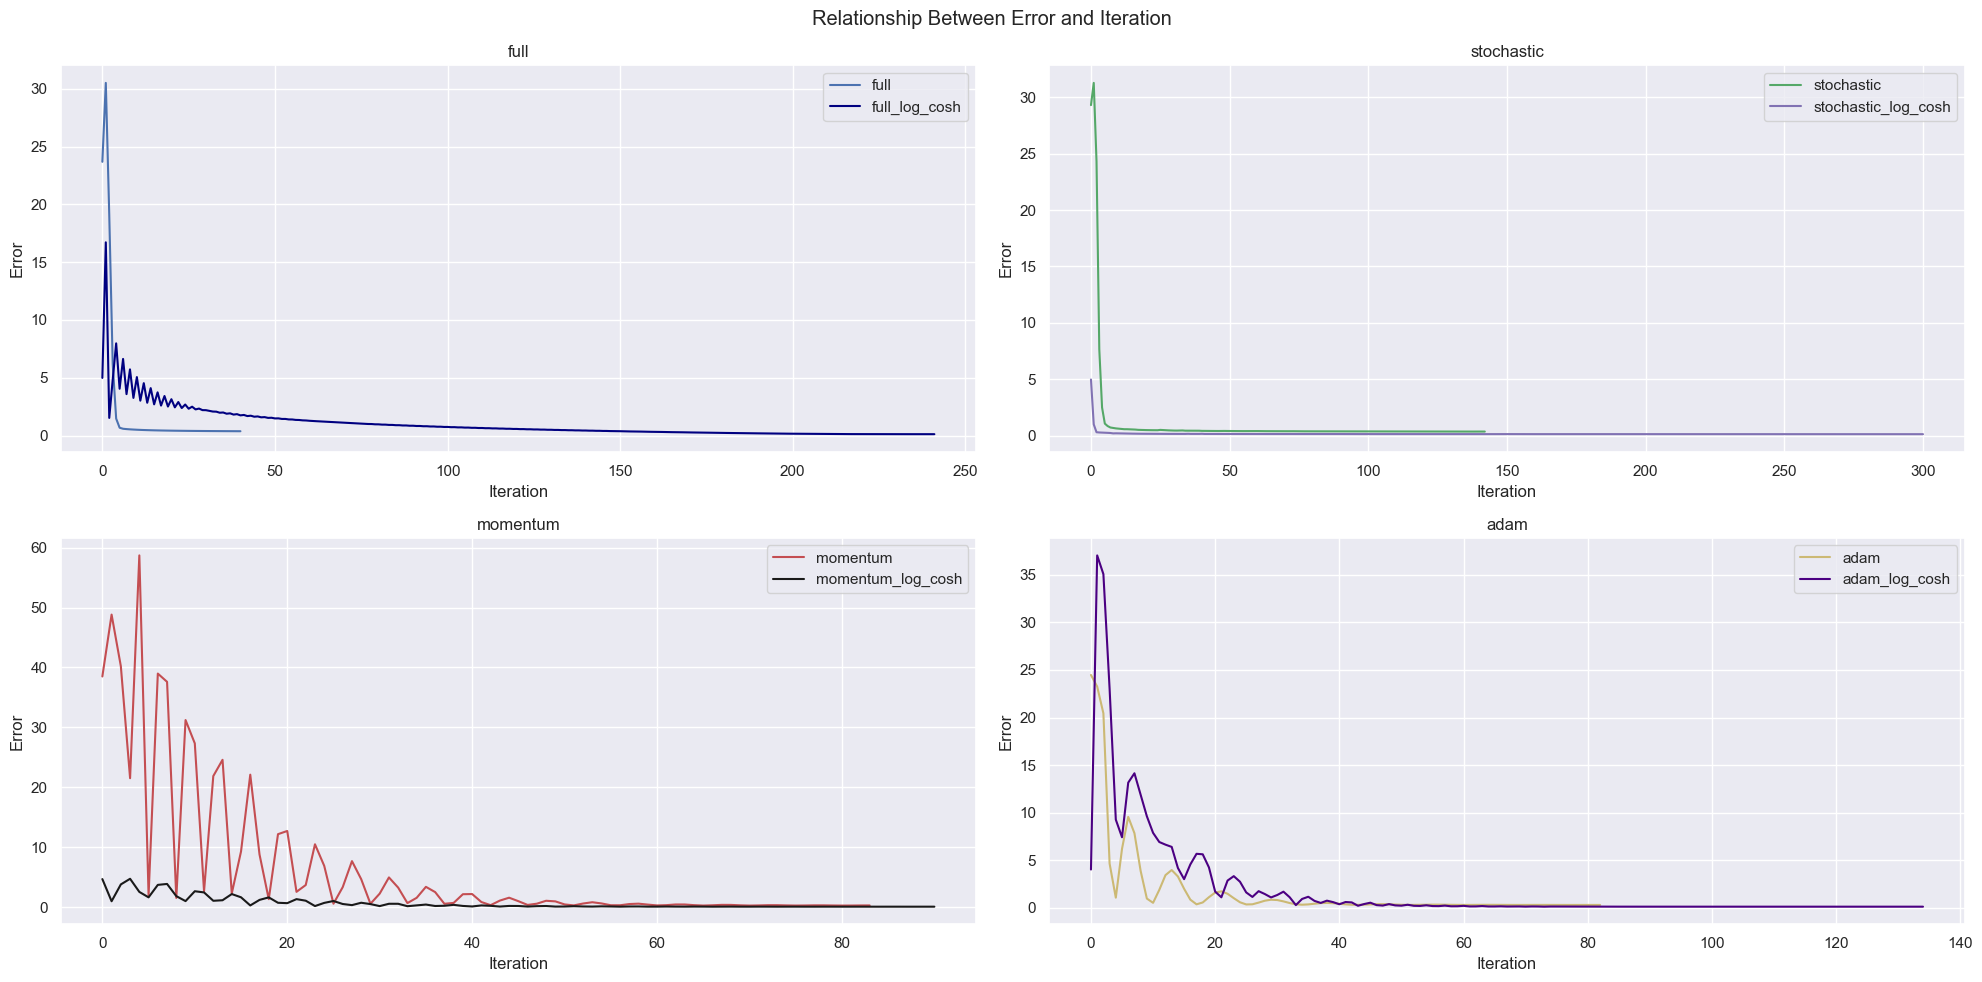

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

colors = ['b', 'g', 'r', 'y']
colors_reg = ['navy', 'm', 'k', 'indigo']


for i, (key, values) in enumerate(history.items()):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(len(values)), y=values, label=key, color=colors[i % len(colors)], ax=axes[row, col])
    axes[row, col].set_title(key)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Error')

for i, (key, values) in enumerate(history_log_cosh.items()):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(len(values)), y=values, label=key + '_log_cosh', color=colors_reg[i % len(colors_reg)], ax=axes[row, col])
    axes[row, col].set_title(key)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Error')

fig.suptitle("Relationship Between Error and Iteration")

plt.tight_layout()
plt.show()


*По графикам видно, что с новой функцией потерь количество итеаций выросло. Моментум сошелся быстрее всех. У моментума ошибка слабее стала шататься.*

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

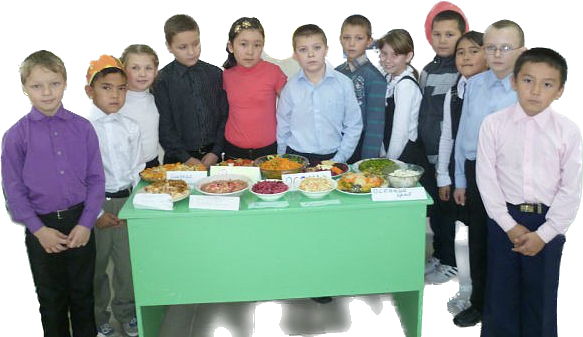

*Да, это был прекрасный праздник осени. Мы с родителями приготовили салат, а потом угощались им всем классом.*

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [51]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

$$
 \\
\nabla_w {{L(w)}} = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} sgn(a(x_i) - y_i) \cdot x_i
$$


$$
    \nabla_w{{L(a, y)}} = \frac{1}{\ell} \sum_{i=1}^{\ell} (a(x_i) - y_i) \cdot x_i \cdot I[\left|a(x_i) - y_i\right| \le \delta] + \delta \cdot sgn(a(x_i) - y_i) \cdot x_i \cdot I[\left|a(x_i) - y_i\right| > \delta]
$$

Пусть $\delta = 1$

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [52]:
from sklearn.metrics import r2_score, mean_squared_error
from tqdm.auto import tqdm
from descents import LossFunction


def fit_regression(descent_name: str, lambda_: int, culc_r2: bool):
  dimension = x.shape[1]

  descent_config = {
      'descent_name': descent_name,
      'kwargs': {
          'dimension': dimension,
          'lambda_': lambda_,
          'loss_function': LossFunction.MAE
      }
  }

  regression = LinearRegression(
      descent_config=descent_config
  )
  regression.fit(X_train, y_train)

  if culc_r2:
    y_train_predict = regression.predict(X_train)
    y_test_predict = regression.predict(X_test)
    return {'train_mae': mean_squared_error(y_train, y_train_predict, squared=True),
            'test_mae': mean_squared_error(y_test, y_test_predict, squared=True),
            'r2score': r2_score(y_test, y_test_predict),
            'iteration': len(regression.loss_history)}, regression.loss_history

  val_loss = regression.calc_loss(X_val, y_val)
  return val_loss


def get_params(descents):
  best_params = []
  for descent_name in descents:
    best_loss = 1e10
    best_lambda = 0
    best_mu = 0
    for lambda_ in tqdm(np.logspace(-5, 1, num=10), desc=f'{descent_name} - Lambda'):
      val_loss = fit_regression(descent_name, lambda_, False)
      if val_loss < best_loss:
        best_lambda = lambda_
        best_loss = val_loss
    best_params.append({'descent_name': descent_name, 'best_loss': best_loss, 'best_lambda': best_lambda})
  return best_params


def culc_metrics(params):
  metrics = {}
  history = {}
  for param in params:
    decent_name = param.get('descent_name')
    loss = param.get('best_loss')
    lambda_ = param.get('best_lambda')
    metrics[decent_name], loss_history = fit_regression(decent_name, lambda_, True)
    history[decent_name] = loss_history
  return metrics, history


params_mae = get_params(['full', 'stochastic', 'momentum', 'adam'])
print('Лучшие параметры: ')
pd.DataFrame(params_mae)

full - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

stochastic - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

momentum - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

adam - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

Лучшие параметры: 


,descent_name,best_loss,best_lambda
0,full,0.376347,2.154435
1,stochastic,0.366050,2.154435
2,momentum,0.356168,2.154435
3,adam,0.354012,10.000000


In [53]:
metrics_mae, history_mae = culc_metrics(params_mae)

print('Таблица сравнений метрик mae:')
display(pd.DataFrame(metrics_mae))
print('\n')
print('Таблица сравнений метрик mse')
display(pd.DataFrame(metrics))

Таблица сравнений метрик mae:


,full,stochastic,momentum,adam
train_mae,0.358117,0.354636,0.344137,0.339416
test_mae,0.362953,0.359756,0.347591,0.343222
r2score,0.708796,0.711360,0.721120,0.724626
iteration,95.000000,301.000000,107.000000,195.000000




Таблица сравнений метрик mse


,full,stochastic,momentum,adam
train_mse,0.373262,0.355344,0.327399,0.298854
test_mse,0.367529,0.350671,0.326923,0.297603
r2score,0.705124,0.718649,0.737703,0.761227
iteration,41.000000,143.000000,84.000000,83.000000


*Однозначно количество итераций стало требоваться больше, $R^2$ улучшился местами*

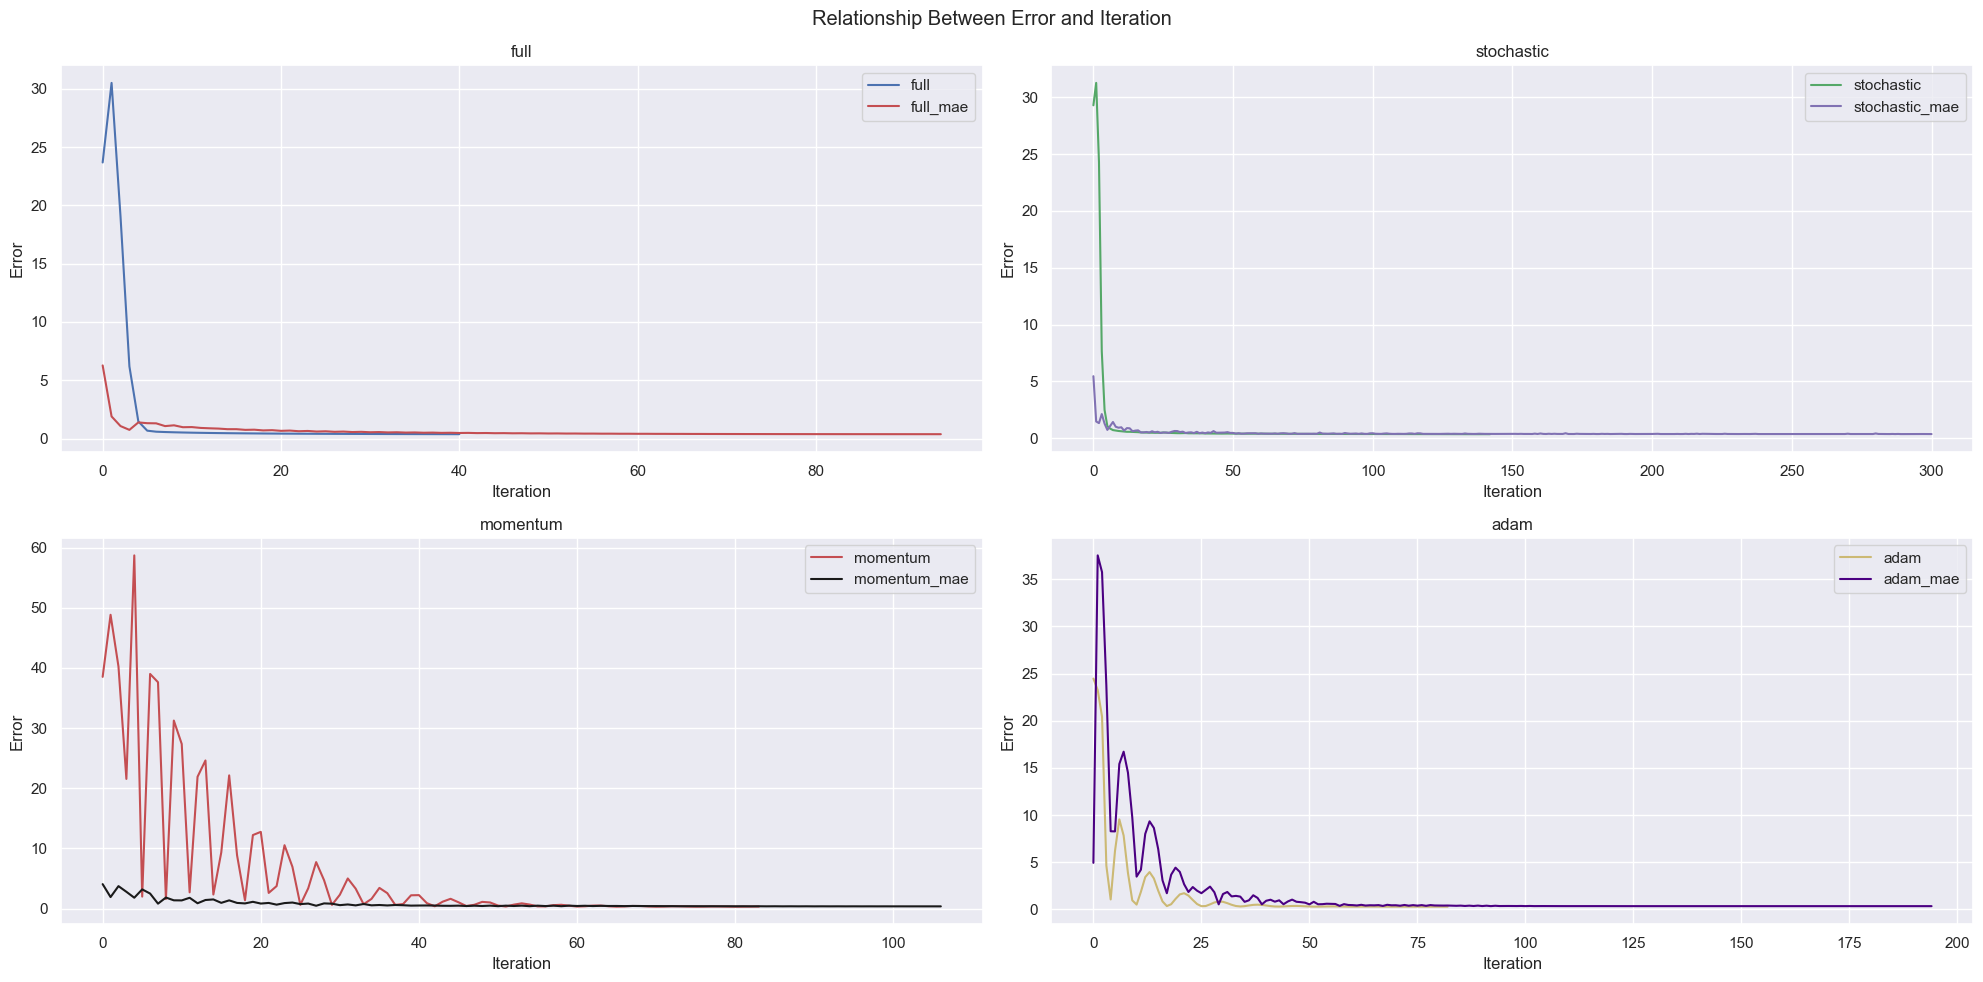

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

colors = ['b', 'g', 'r', 'y']
colors_reg = ['r', 'm', 'k', 'indigo']


for i, (key, values) in enumerate(history.items()):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(len(values)), y=values, label=key, color=colors[i % len(colors)], ax=axes[row, col])
    axes[row, col].set_title(key)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Error')

for i, (key, values) in enumerate(history_mae.items()):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(len(values)), y=values, label=key + '_mae', color=colors_reg[i % len(colors_reg)], ax=axes[row, col])
    axes[row, col].set_title(key)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Error')

fig.suptitle("Relationship Between Error and Iteration")

plt.tight_layout()
plt.show()


*В графиках так же заметна существенная разница*

In [55]:
from sklearn.metrics import r2_score, mean_squared_error
from tqdm.auto import tqdm
from descents import LossFunction


def fit_regression(descent_name: str, lambda_: int, culc_r2: bool):
  dimension = x.shape[1]

  descent_config = {
      'descent_name': descent_name,
      'kwargs': {
          'dimension': dimension,
          'lambda_': lambda_,
          'loss_function': LossFunction.Huber
      }
  }

  regression = LinearRegression(
      descent_config=descent_config
  )
  regression.fit(X_train, y_train)

  if culc_r2:
    y_train_predict = regression.predict(X_train)
    y_test_predict = regression.predict(X_test)
    return {'train_huber': mean_squared_error(y_train, y_train_predict, squared=True),
            'test_huber': mean_squared_error(y_test, y_test_predict, squared=True),
            'r2score': r2_score(y_test, y_test_predict),
            'iteration': len(regression.loss_history)}, regression.loss_history

  val_loss = regression.calc_loss(X_val, y_val)
  return val_loss


def get_params(descents):
  best_params = []
  for descent_name in descents:
    best_loss = 1e10
    best_lambda = 0
    best_mu = 0
    for lambda_ in tqdm(np.logspace(-5, 1, num=10), desc=f'{descent_name} - Lambda'):
      val_loss = fit_regression(descent_name, lambda_, False)
      if val_loss < best_loss:
        best_lambda = lambda_
        best_loss = val_loss
    best_params.append({'descent_name': descent_name, 'best_loss': best_loss, 'best_lambda': best_lambda})
  return best_params


def culc_metrics(params):
  metrics = {}
  history = {}
  for param in params:
    decent_name = param.get('descent_name')
    loss = param.get('best_loss')
    lambda_ = param.get('best_lambda')
    metrics[decent_name], loss_history = fit_regression(decent_name, lambda_, True)
    history[decent_name] = loss_history
  return metrics, history


params_huber = get_params(['full', 'stochastic', 'momentum', 'adam'])
print('Лучшие параметры: ')
pd.DataFrame(params_huber)

full - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

stochastic - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

momentum - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

adam - Lambda:   0%|          | 0/10 [00:00<?, ?it/s]

Лучшие параметры: 


,descent_name,best_loss,best_lambda
0,full,0.127650,10.000000
1,stochastic,0.130304,10.000000
2,momentum,0.126944,2.154435
3,adam,0.124139,10.000000


In [56]:
metrics_huber, history_huber = culc_metrics(params_huber)

print('Таблица сравнений метрик huber:')
display(pd.DataFrame(metrics_huber))
print('\n')
print('Таблица сравнений метрик mse')
display(pd.DataFrame(metrics))

Таблица сравнений метрик huber:


,full,stochastic,momentum,adam
train_huber,0.317178,0.317084,0.314518,0.310199
test_huber,0.318161,0.318725,0.316268,0.311491
r2score,0.744733,0.744280,0.746251,0.750084
iteration,292.000000,301.000000,108.000000,137.000000




Таблица сравнений метрик mse


,full,stochastic,momentum,adam
train_mse,0.373262,0.355344,0.327399,0.298854
test_mse,0.367529,0.350671,0.326923,0.297603
r2score,0.705124,0.718649,0.737703,0.761227
iteration,41.000000,143.000000,84.000000,83.000000


*Итерации так же подросли. Качество меняется от метода к методу.*

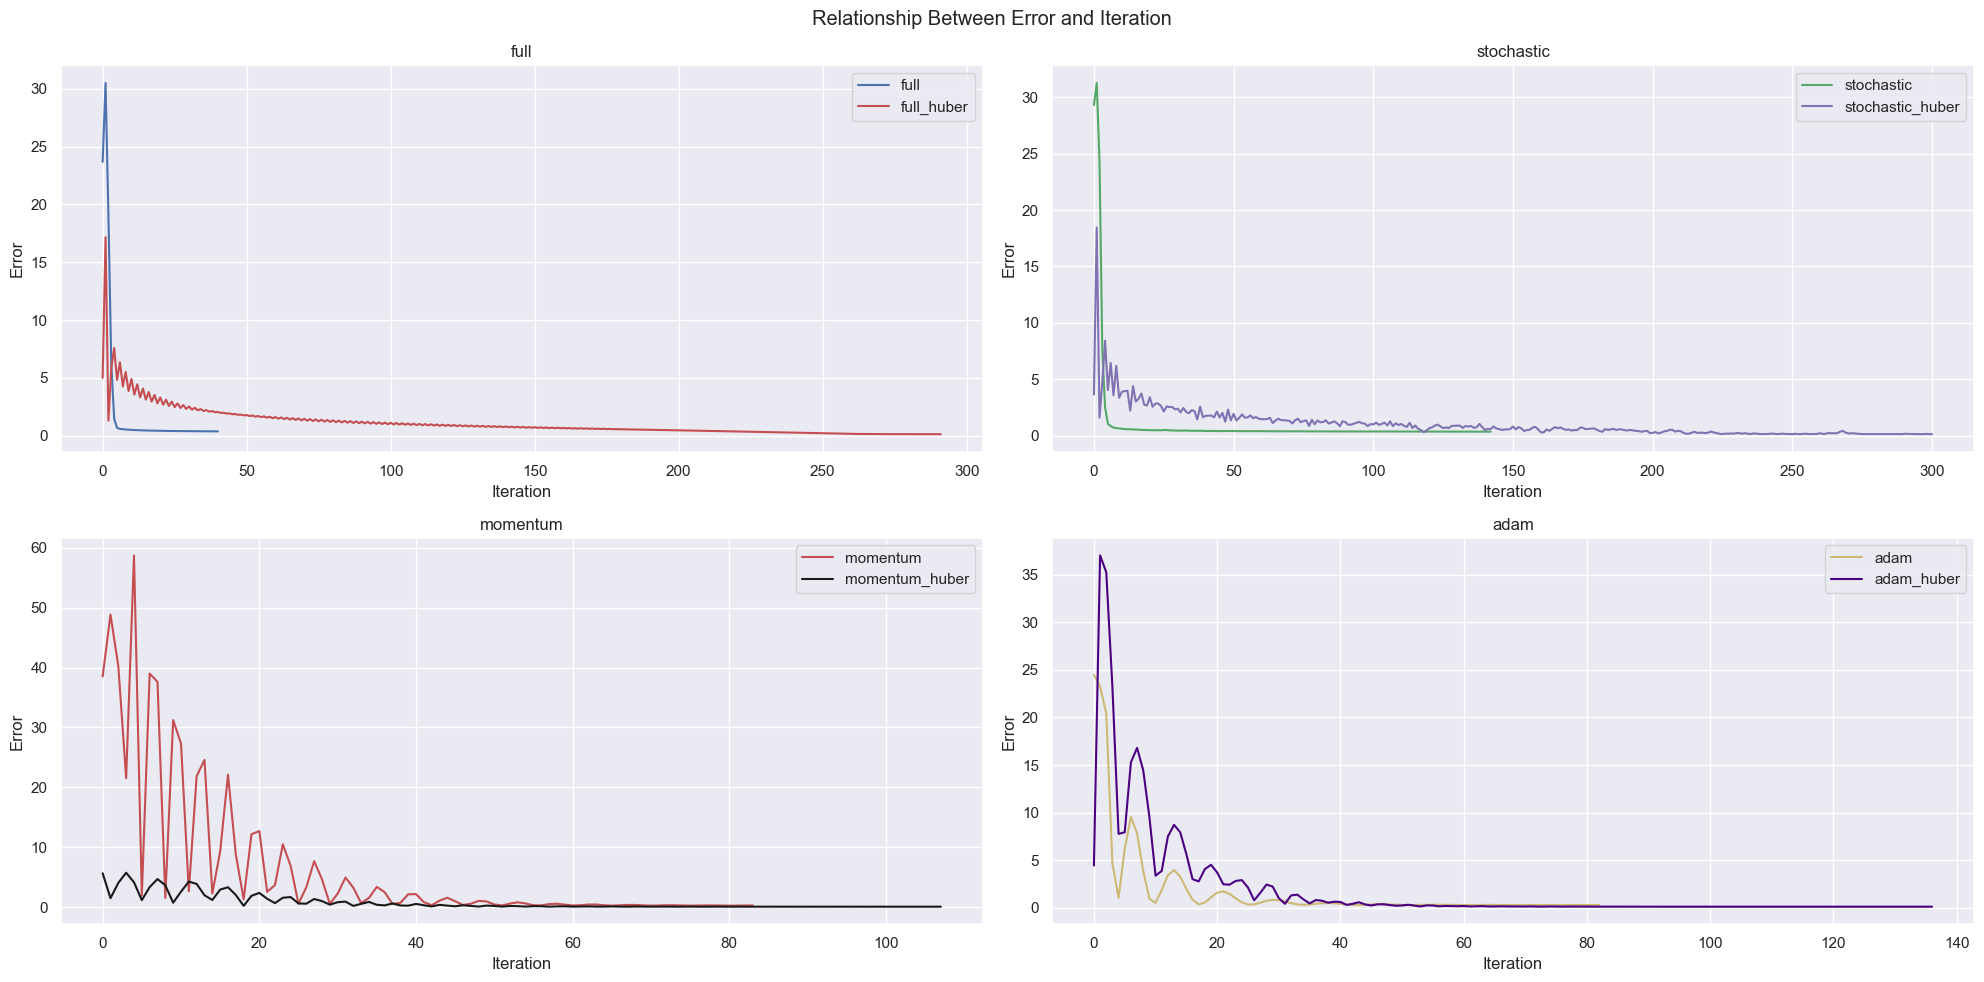

In [57]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

colors = ['b', 'g', 'r', 'y']
colors_reg = ['r', 'm', 'k', 'indigo']


for i, (key, values) in enumerate(history.items()):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(len(values)), y=values, label=key, color=colors[i % len(colors)], ax=axes[row, col])
    axes[row, col].set_title(key)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Error')

for i, (key, values) in enumerate(history_huber.items()):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(len(values)), y=values, label=key + '_huber', color=colors_reg[i % len(colors_reg)], ax=axes[row, col])
    axes[row, col].set_title(key)
    axes[row, col].set_xlabel('Iteration')
    axes[row, col].set_ylabel('Error')

fig.suptitle("Relationship Between Error and Iteration")

plt.tight_layout()
plt.show()


*Графики говорят сами за себя.*

In [58]:
print('Таблица сравнений метрик mse')
display(pd.DataFrame(metrics))

print('Таблица сравнений метрик log cosh')
display(pd.DataFrame(metrics_log_cosh))

print('Таблица сравнений метрик huber')
display(pd.DataFrame(metrics_huber))
        
print('Таблица сравнений метрик mae')
display(pd.DataFrame(metrics_mae))

Таблица сравнений метрик mse


,full,stochastic,momentum,adam
train_mse,0.373262,0.355344,0.327399,0.298854
test_mse,0.367529,0.350671,0.326923,0.297603
r2score,0.705124,0.718649,0.737703,0.761227
iteration,41.000000,143.000000,84.000000,83.000000


Таблица сравнений метрик log cosh


,full,stochastic,momentum,adam
train_log_cosh,0.313662,0.333148,0.313140,0.308227
test_log_cosh,0.315574,0.334831,0.314403,0.309366
r2score,0.746809,0.731358,0.747748,0.751789
iteration,242.000000,301.000000,91.000000,135.000000


Таблица сравнений метрик huber


,full,stochastic,momentum,adam
train_huber,0.317178,0.317084,0.314518,0.310199
test_huber,0.318161,0.318725,0.316268,0.311491
r2score,0.744733,0.744280,0.746251,0.750084
iteration,292.000000,301.000000,108.000000,137.000000


Таблица сравнений метрик mae


,full,stochastic,momentum,adam
train_mae,0.358117,0.354636,0.344137,0.339416
test_mae,0.362953,0.359756,0.347591,0.343222
r2score,0.708796,0.711360,0.721120,0.724626
iteration,95.000000,301.000000,107.000000,195.000000



*Относительно метрики $R^2$:
Ванильный GD имеет лучшую функцию потерь MAE с небольшой разницей от MSE.
Стахостический имеет лучшую функцию потерь Huber.
Momentum имеет лучшую функцию потерь Log Cosh с небольшой разницей от Huber.
Adam имеет лучшую функцию потерь MSE.*
